In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
from brokenaxes import brokenaxes
import pingouin as pg
import colorsys

stim25sdecodingfilename = 'D:\\stimdecoding_25s_M2.csv'
passivedecodingfilename = 'D:\\stimdecoding_25s_passive.csv'
choicedecodingfilename = 'D:\\choicedecoding_25s_M2.csv'

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#,'#6ded94','#50d979','#36bf5f']
STIM_COLOR = '#E8CA17'
CHOICE_COLOR = '#9DE817'

M2animals = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
# passiveanimals = ['TH_201','TH_203','LA_204','LA_205','TH_200', 'TH_230','AE_229','TH_233','TH_234']
# dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
# danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

# retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
# did_learn = ['BS_92','BS_103','BS_111','BS_179']
# did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
# indeterminate = ['BS_139','BS_165','BS_191','BS_192']

# dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']#,'DS_15','DS_19']
# opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
# tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','TH_217','AE_235','AE_236','TH_237']
# unuseddualanimals = ['BS_78']
# danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28','DS_16','DS_17','DS_22','DS_13','DS_23']

act_directory = 'D:\\Analysis_Cache_M2_300'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'Z:\\Behavioor'


stdfont = 14
stdyfrac = 0.06

C:\Users\insan\anaconda3\envs\Ephyanalysis\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Load Data

In [2]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

C:\Users\insan\Desktop\EphysAnalysis\Notebooks\TH\Dual\../../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite v

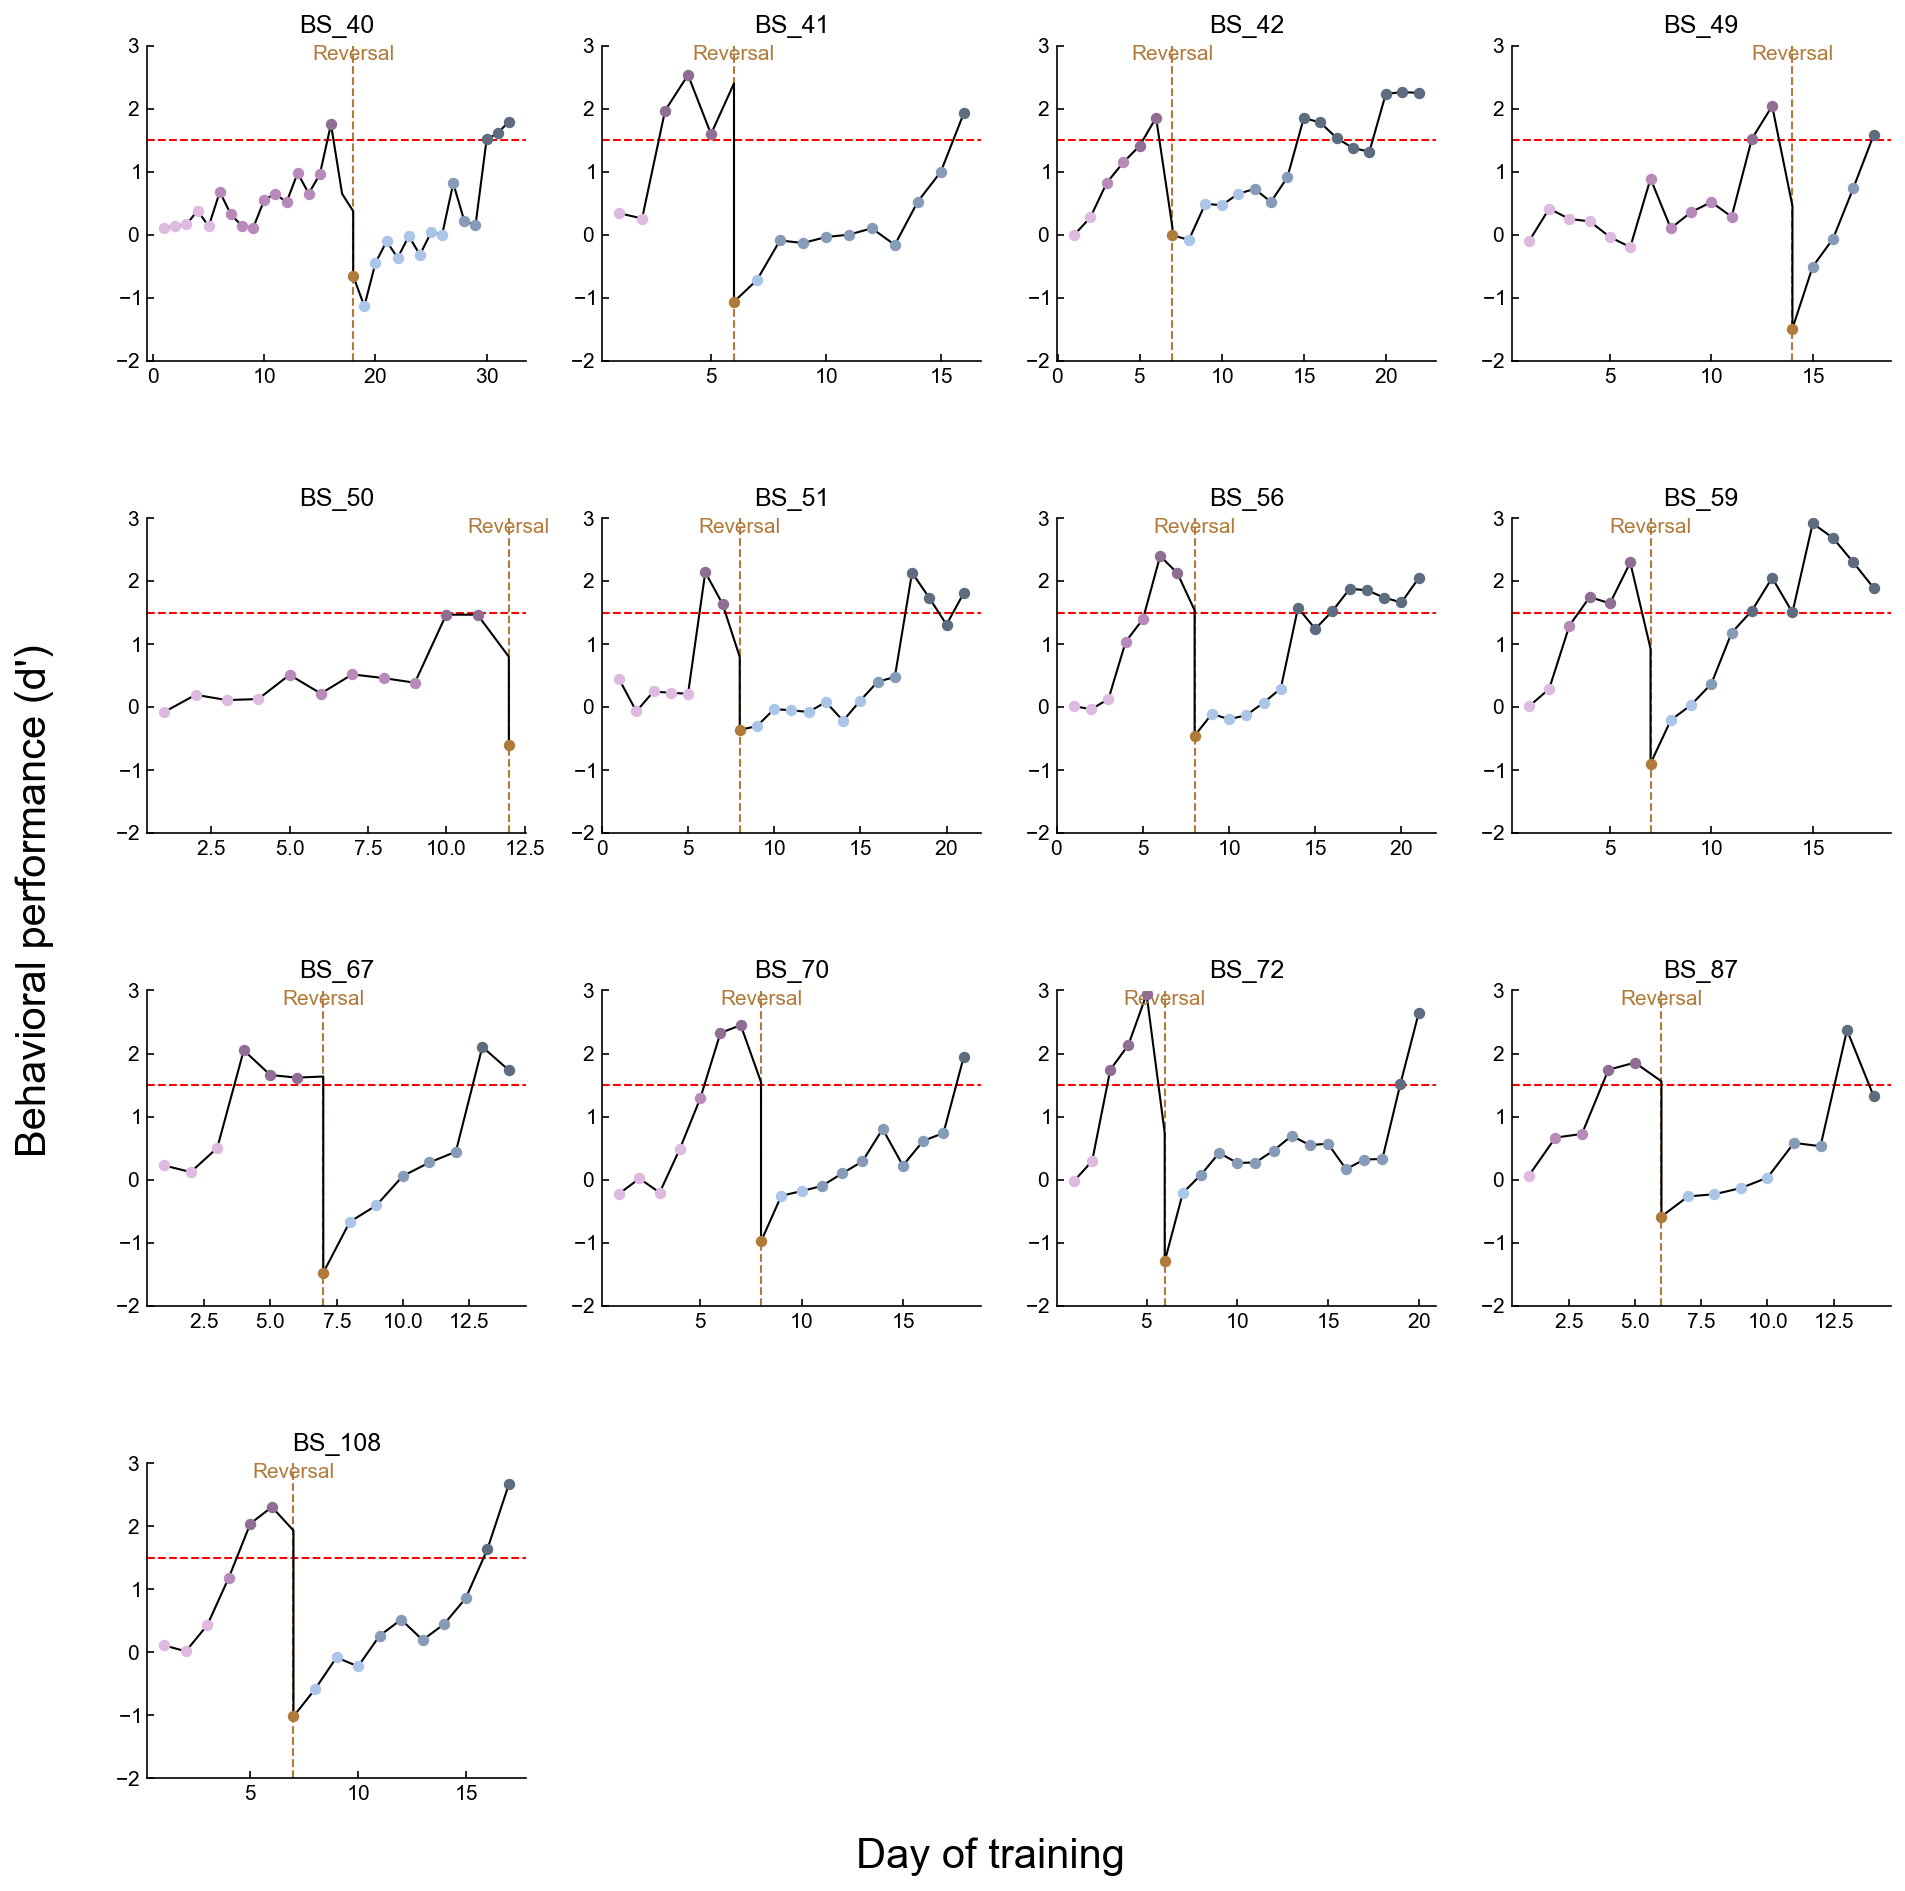

In [3]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(M2animals,animalBehaviors,plot=True)

In [4]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'M2':
        continue
        
    if sessionfile.meta.animal not in M2animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 554/554 [00:07<00:00, 76.78it/s] 


In [5]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1624/1624 [00:31<00:00, 51.19it/s] 

errors for: []


# Load Decoding Data

In [6]:
stim_25s_df = pd.read_csv(stim25sdecodingfilename)
passive_df = pd.read_csv(passivedecodingfilename)
choice_df = pd.read_csv(choicedecodingfilename)
dec_df = pd.concat([stim_25s_df,choice_df,passive_df])

def getDataPoint(df,session,clust,categories,column):
    df = df[df['session']==session]
    df = df[df['clust']==clust]
    df = df[df['categories']==categories]
    val = list(df[column])
    if len(val) == 1:
        return val[0]
    elif len(val) <= 0:
        return np.nan
    else:
        raise Exception('Incorrent length. Duplicate values')

In [7]:
stim25sdecodingfilename

'D:\\stimdecoding_25s_M2.csv'

In [8]:
act_directory

'D:\\Analysis_Cache_M2_300'

In [9]:
FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []

ChoiceMod_preearly = []
ChoiceMod_prelate = []
ChoiceMod_preexpert = []
ChoiceMod_postearly = []
ChoiceMod_postlate = []
ChoiceMod_postexpert = []
ChoiceMod_switch = []

Stim_Dec_preearly = []
Stim_Dec_prelate = []
Stim_Dec_preexpert = []
Stim_Dec_postearly = []
Stim_Dec_postlate = []
Stim_Dec_postexpert = []

Choice_Dec_preearly = []
Choice_Dec_prelate = []
Choice_Dec_preexpert = []
Choice_Dec_postearly = []
Choice_Dec_postlate = []
Choice_Dec_postexpert = []

Control_Stim_Dec_preearly = []
Control_Stim_Dec_prelate = []
Control_Stim_Dec_preexpert = []
Control_Stim_Dec_postearly = []
Control_Stim_Dec_postlate = []
Control_Stim_Dec_postexpert = []

Control_Choice_Dec_preearly = []
Control_Choice_Dec_prelate = []
Control_Choice_Dec_preexpert = []
Control_Choice_Dec_postearly = []
Control_Choice_Dec_postlate = []
Control_Choice_Dec_postexpert = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    except Exception as e:
        print(e)
        FRmod = np.nan
    try:
        ChoiceMod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation_choice
    except Exception as e:
        ChoiceMod = np.nan
        print(f"{session} - choice FRmod: {e}")
        
    stim_acc = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    choice_acc = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    stim_acc_control = getDataPoint(dec_df,session,clust,'stimulus','synthetic_control_weighted_accuracy')
    choice_acc_control = getDataPoint(dec_df,session,clust,'response','synthetic_control_weighted_accuracy')
    
#     if getDataPoint(dec_df,session,clust,'stimulus','pval_shuffled_control') > 0.05 or getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control') > 0.05:
#         stim_acc = np.nan
#     if getDataPoint(dec_df,session,clust,'response','pval_shuffled_control') > 0.05 or getDataPoint(dec_df,session,clust,'response','pval_synthetic_control') > 0.05:
#         choice_acc = np.nan
    if getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control') > 0.05:
        stim_acc = np.nan
    if getDataPoint(dec_df,session,clust,'response','pval_synthetic_control') > 0.05:
        choice_acc = np.nan
        
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    if EILphases[idx] == 'pre early':
        FRmod_preearly.append(FRmod)
        ChoiceMod_preearly.append(ChoiceMod)
#         Ramping_preearly.append(Ramp)
        Stim_Dec_preearly.append(stim_acc)
        Choice_Dec_preearly.append(choice_acc)
        Control_Stim_Dec_preearly.append(stim_acc_control)
        Control_Choice_Dec_preearly.append(choice_acc_control)
    elif EILphases[idx] == 'pre late':
        FRmod_prelate.append(FRmod)
        ChoiceMod_prelate.append(ChoiceMod)
#         Ramping_prelate.append(Ramp)
        Stim_Dec_prelate.append(stim_acc)
        Choice_Dec_prelate.append(choice_acc)
        Control_Stim_Dec_prelate.append(stim_acc_control)
        Control_Choice_Dec_prelate.append(choice_acc_control)
    elif EILphases[idx] == 'pre expert':
        FRmod_preexpert.append(FRmod)
        ChoiceMod_preexpert.append(ChoiceMod)
#         Ramping_preexpert.append(Ramp)
        Stim_Dec_preexpert.append(stim_acc)
        Choice_Dec_preexpert.append(choice_acc)
        Control_Stim_Dec_preexpert.append(stim_acc_control)
        Control_Choice_Dec_preexpert.append(choice_acc_control)
    elif EILphases[idx] == 'post early':
        FRmod_postearly.append(FRmod)
        ChoiceMod_postearly.append(ChoiceMod)
#         Ramping_postearly.append(Ramp)
        Stim_Dec_postearly.append(stim_acc)
        Choice_Dec_postearly.append(choice_acc)
        Control_Stim_Dec_postearly.append(stim_acc_control)
        Control_Choice_Dec_postearly.append(choice_acc_control)
    elif EILphases[idx] == 'post late':
        FRmod_postlate.append(FRmod)
        ChoiceMod_postlate.append(ChoiceMod)
#         Ramping_postlate.append(Ramp)
        Stim_Dec_postlate.append(stim_acc)
        Choice_Dec_postlate.append(choice_acc)
        Control_Stim_Dec_postlate.append(stim_acc_control)
        Control_Choice_Dec_postlate.append(choice_acc_control)
    elif EILphases[idx] == 'post expert':
        FRmod_postexpert.append(FRmod)
        ChoiceMod_postexpert.append(ChoiceMod)
#         Ramping_postexpert.append(Ramp)
        Stim_Dec_postexpert.append(stim_acc)
        Choice_Dec_postexpert.append(choice_acc)
        Control_Stim_Dec_postexpert.append(stim_acc_control)
        Control_Choice_Dec_postexpert.append(choice_acc_control)
        
FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)

ChoiceMod_preearly = np.array(ChoiceMod_preearly)
ChoiceMod_prelate = np.array(ChoiceMod_prelate)
ChoiceMod_preexpert = np.array(ChoiceMod_preexpert)
ChoiceMod_postearly = np.array(ChoiceMod_postearly)
ChoiceMod_postlate = np.array(ChoiceMod_postlate)
ChoiceMod_postexpert = np.array(ChoiceMod_postexpert)

# Ramping_preearly = np.array(Ramping_preearly)
# Ramping_prelate = np.array(Ramping_prelate)
# Ramping_preexpert = np.array(Ramping_preexpert)
# Ramping_postearly = np.array(Ramping_postearly)
# Ramping_postlate = np.array(Ramping_postlate)
# Ramping_postexpert = np.array(Ramping_postexpert)
        
Stim_Dec_preearly = np.array(Stim_Dec_preearly)
Stim_Dec_prelate = np.array(Stim_Dec_prelate)
Stim_Dec_preexpert = np.array(Stim_Dec_preexpert)
Stim_Dec_postearly = np.array(Stim_Dec_postearly)
Stim_Dec_postlate = np.array(Stim_Dec_postlate)
Stim_Dec_postexpert = np.array(Stim_Dec_postexpert)

Choice_Dec_preearly = np.array(Choice_Dec_preearly)
Choice_Dec_prelate = np.array(Choice_Dec_prelate)
Choice_Dec_preexpert = np.array(Choice_Dec_preexpert)
Choice_Dec_postearly = np.array(Choice_Dec_postearly)
Choice_Dec_postlate = np.array(Choice_Dec_postlate)
Choice_Dec_postexpert = np.array(Choice_Dec_postexpert)

Control_Stim_Dec_preearly = np.array(Control_Stim_Dec_preearly)
Control_Stim_Dec_prelate = np.array(Control_Stim_Dec_prelate)
Control_Stim_Dec_preexpert = np.array(Control_Stim_Dec_preexpert)
Control_Stim_Dec_postearly = np.array(Control_Stim_Dec_postearly)
Control_Stim_Dec_postlate = np.array(Control_Stim_Dec_postlate)
Control_Stim_Dec_postexpert = np.array(Control_Stim_Dec_postexpert)

Control_Choice_Dec_preearly = np.array(Control_Choice_Dec_preearly)
Control_Choice_Dec_prelate = np.array(Control_Choice_Dec_prelate)
Control_Choice_Dec_preexpert = np.array(Control_Choice_Dec_preexpert)
Control_Choice_Dec_postearly = np.array(Control_Choice_Dec_postearly)
Control_Choice_Dec_postlate = np.array(Control_Choice_Dec_postlate)
Control_Choice_Dec_postexpert = np.array(Control_Choice_Dec_postexpert)

1624it [00:43, 37.54it/s]


In [10]:
Control_Stim_Dec_overall = np.concatenate([Control_Stim_Dec_preearly,Control_Stim_Dec_prelate,Control_Stim_Dec_preexpert,Control_Stim_Dec_postearly,Control_Stim_Dec_postlate,Control_Stim_Dec_postexpert])
FRmod_Stim_overall = np.concatenate([FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert])

Control_Choice_Dec_overall = np.concatenate([Control_Choice_Dec_preearly,Control_Choice_Dec_prelate,Control_Choice_Dec_preexpert,Control_Choice_Dec_postearly,Control_Choice_Dec_postlate,Control_Choice_Dec_postexpert])

# Task encoders

In [11]:
stim_25s_df = pd.read_csv(stim25sdecodingfilename)
passive_df = pd.read_csv(passivedecodingfilename)
choice_df = pd.read_csv(choicedecodingfilename)
dec_df = pd.concat([stim_25s_df,choice_df,passive_df])

def getDataPoint(df,session,clust,categories,column):
    df = df[df['session']==session]
    df = df[df['clust']==clust]
    df = df[df['categories']==categories]
    val = list(df[column])
    if len(val) == 1:
        return val[0]
    elif len(val) <= 0:
        return np.nan
    else:
        raise Exception('Incorrent length. Duplicate values')

In [12]:
stim_acc = []
choice_acc = []
stim_acc_c = []
choice_acc_c = []
stim_acc_s = []
choice_acc_s = []
pval_stim_s = []
pval_choice_s = []
pval_stim_c = []
pval_choice_c = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    stim_accuracy = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    choice_accuracy = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    
    pvalue_stim_s = getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control')
    pvalue_choice_s = getDataPoint(dec_df,session,clust,'response','pval_synthetic_control')
    
    pvalue_stim_c = 0.01#getDataPoint(dec_df,session,clust,'stimulus','pval_shuffled_control')
    pvalue_choice_c = 0.01#getDataPoint(dec_df,session,clust,'response','pval_shuffled_control')
    
    stim_acc.append(stim_accuracy)
    choice_acc.append(choice_accuracy)
    
    pval_stim_s.append(pvalue_stim_s)
    pval_choice_s.append(pvalue_choice_s)
    
    pval_stim_c.append(pvalue_stim_c)
    pval_choice_c.append(pvalue_choice_c)
    
stim_acc = np.array(stim_acc)
choice_acc = np.array(choice_acc)
pval_stim_s = np.array(pval_stim_s)
pval_choice_s = np.array(pval_choice_s)
pval_stim_c = np.array(pval_stim_c)
pval_choice_c = np.array(pval_choice_c)

1624it [00:06, 235.34it/s]


In [13]:
def get_TE_mask(acc,pval_s):#,pval_c):
    low_decoders = np.less(acc,0.5)
    low_accuracies = acc[low_decoders]
    low_magnitudes = np.absolute(low_accuracies-0.5)

    low_magnitudes = np.sort(low_magnitudes)
    task_encoder_threshold = 0.5+low_magnitudes[int(0.95 * len(low_magnitudes))]
    print('Task encoder threshold: '+str(task_encoder_threshold))

    is_finite = np.isfinite(acc)
    #is_valid_pval = np.logical_and(np.less(pval_s,0.05) , np.less(pval_c,0.05))
    is_valid_pval = np.less(pval_s,0.05)
    is_TE = np.greater_equal(acc,task_encoder_threshold)
    is_TE = np.logical_and(is_TE,is_finite)
    is_TE = np.logical_and(is_TE,is_valid_pval)
    return is_TE,task_encoder_threshold

is_TE_s,task_encoder_threshold_s = get_TE_mask(stim_acc,pval_stim_s)#,pval_stim_c)
is_TE_c,task_encoder_threshold_c = get_TE_mask(choice_acc,pval_choice_s)#,pval_choice_c)

Task encoder threshold: 0.5749218718219907
Task encoder threshold: 0.6260613726551226


In [14]:
FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []

# Ramping_preearly = []
# Ramping_prelate = []
# Ramping_preexpert = []
# Ramping_postearly = []
# Ramping_postlate = []
# Ramping_postexpert = []

preearly_animals = []
prelate_animals = []
preexpert_animals = []
postearly_animals = []
postlate_animals = []
postexpert_animals = []

#cellstouseFR = 'all cells'
cellstouseFR = 'task encoders'

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not np.isfinite(stim_acc[idx]) or pval_stim_s[idx] > 0.05 or stim_acc[idx] < task_encoder_threshold_s:
            continue
        if np.isnan(stim_acc[idx]) or np.isnan(pval_stim_s[idx]):
            continue
        
    if sessionfile.responsiveness[clust]['all_trials'].FR < sessionfile.responsiveness[clust]['all_trials'].FRbaseline:
        #print('excluded')
        #continue
        pass
    
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
        
    if EILphases[idx] == 'pre early':
        FRmod_preearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
#         Ramping_preearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre late':
        FRmod_prelate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
#         Ramping_prelate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        prelate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre expert':
        FRmod_preexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
#         Ramping_preexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preexpert_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post early':
        FRmod_postearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
#         Ramping_postearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post late':
        FRmod_postlate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
#         Ramping_postlate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postlate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post expert':
        FRmod_postexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
#         Ramping_postexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postexpert_animals.append(sessionfile.meta.animal)

FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)

1624it [00:32, 49.77it/s] 


4.035797023968636
3.1638418079096016
3.7719298245614037
2.595057833859091
3.37918447925691
6.156156156156155


meta NOT subset; don't know how to subset; dropped


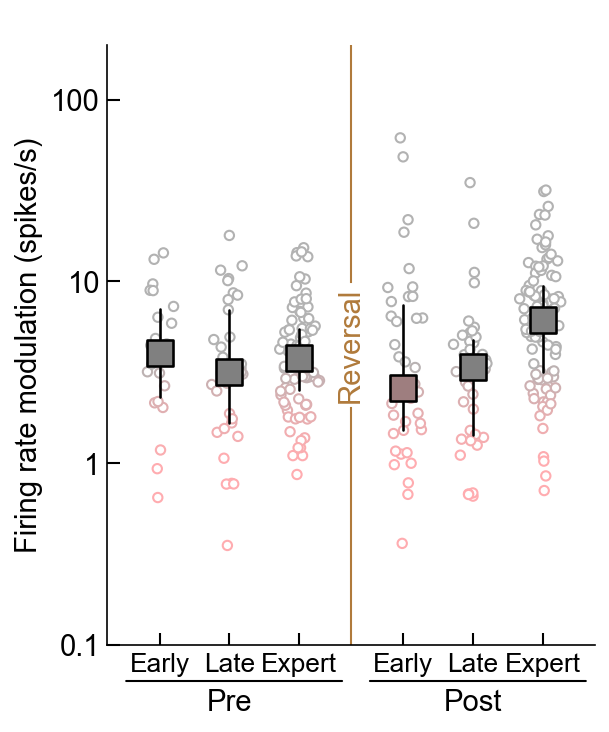

In [17]:
#Stimulus
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 2.3
spread = 2.5
# colors = NCR_CR_cmap( (Y-(mn-spread/2))/ (spread) )
    
###
    
FRmod_baseline_median = 2.3
data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

###
X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]
_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.75,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.75,minjitter=0.075)
colors = NCR_CR_cmap( (Y-(mn-spread/2))/ (spread) )

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10,clip_on=False)
ax.set_yscale('log',subs=[])

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)

    print(median)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='s')
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')


################################################################################################################
labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([0.1,200])
ax.set_yticks([0.1,1,10,100])
ax.set_yticklabels(['0.1','1','10','100'])
ylab = ax.set_ylabel('Firing rate modulation (spikes/s)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=True)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

Y = np.mean(ax.get_ylim())
Y = 10**np.mean(np.log10(ax.get_ylim()))
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]*2]*2,color='white',alpha=0.4,zorder=-5,clip_on=False)

ttl = ax.set_title(' ')
artists = [ylab,t1,t2,ttl]
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Multi-region\\FRmod\\FRmod overlearning M2 TE 300.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [19]:
print(len(FRmod_preearly))
print(len(FRmod_prelate))
print(len(FRmod_preexpert))
print(len(FRmod_postearly))
print(len(FRmod_postlate))
print(len(FRmod_postexpert))

22
33
87
38
40
97


In [20]:
stim_KDE = gaussian_kde(ilep.rmnan(stim_acc)*100, bw_method='scott')
choice_KDE = gaussian_kde(ilep.rmnan(choice_acc)*100, bw_method='scott')
x_range = np.linspace(0,100,1000)


In [21]:
n_te = 0
n_tot = 0

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    if EILphases[idx] not in ['pre early','pre late','pre expert','post early','post late','post expert']:
        continue
    
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
        
    n_tot+=1
    if is_TE_s[idx]:
        n_te+=1

1624it [00:20, 80.57it/s] 


In [22]:
print(f"{n_te}/{n_tot} = {n_te/n_tot}")

317/1343 = 0.23603871928518244


meta NOT subset; don't know how to subset; dropped


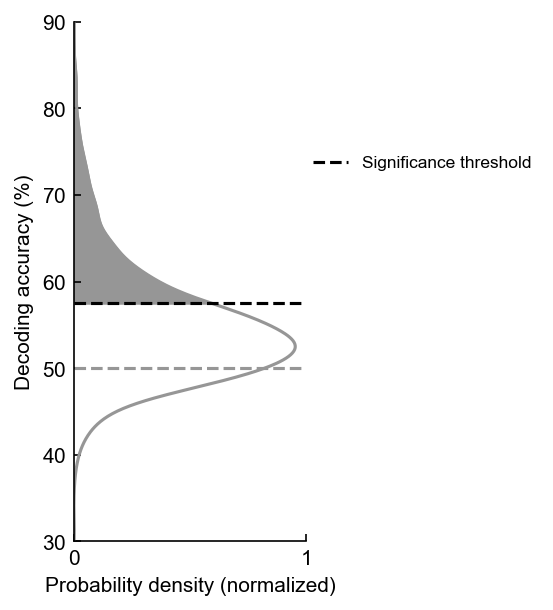

In [23]:
#fig = plt.figure(figsize=(4,4.5))
fig, ax = plt.subplots(figsize=(2,4.5))
#gs = fig.add_gridspec(2,1,wspace=0.25,hspace=0.5)
#axs = [plt.subplot(gs[i,j]) for i,j in product(range(2),range(1))]
axs = [ax]

axs[0].plot(stim_KDE.evaluate(x_range),x_range,color=GOOD_GREY)
#axs[1].plot(x_range,choice_KDE.evaluate(x_range),color=CHOICE_COLOR)

x_range_stim_TEs = np.linspace(task_encoder_threshold_s*100,100,1000)
axs[0].fill_betweenx(x_range_stim_TEs,stim_KDE.evaluate(x_range_stim_TEs),color=GOOD_GREY)
x_range_choice_TEs = np.linspace(task_encoder_threshold_c*100,100,1000)
#axs[1].fill_between(x_range_choice_TEs,choice_KDE.evaluate(x_range_choice_TEs),color=CHOICE_COLOR)

axs[0].axhline(task_encoder_threshold_s*100,color='k',linestyle='--')
#axs[1].axvline(task_encoder_threshold_c*100,color='k',linestyle='--')

for ax in axs:
    ax.axhline(50,color=GOOD_GREY,linestyle='--')
    
    ax.set_ylim([30,90])
    ax.set_ylabel('Decoding accuracy (%)')

    ax.set_xlim([0,ax.get_xlim()[1]])
    ax.set_xticks([0,ax.get_xlim()[1]])
    ax.set_xticklabels([0,1])
    #ax.get_yaxis().set_visible(False)
    #ax.spines['left'].set_visible(False)
    ax.set_xlabel('Probability density (normalized)')

#axs[0].plot([],[],color=STIM_COLOR,label='stimulus')
#axs[0].plot([],[],color=CHOICE_COLOR,label='choice')
axs[0].axhline(np.nan,color='k',linestyle='--',label='Significance threshold')
#axs[0].axvline(np.nan,color=GOOD_GREY,linestyle='--',label='Chance')

lgd = axs[0].legend(frameon=False,loc=(1,0.7))
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Multi-region\\Task encoder\\TE schematics.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

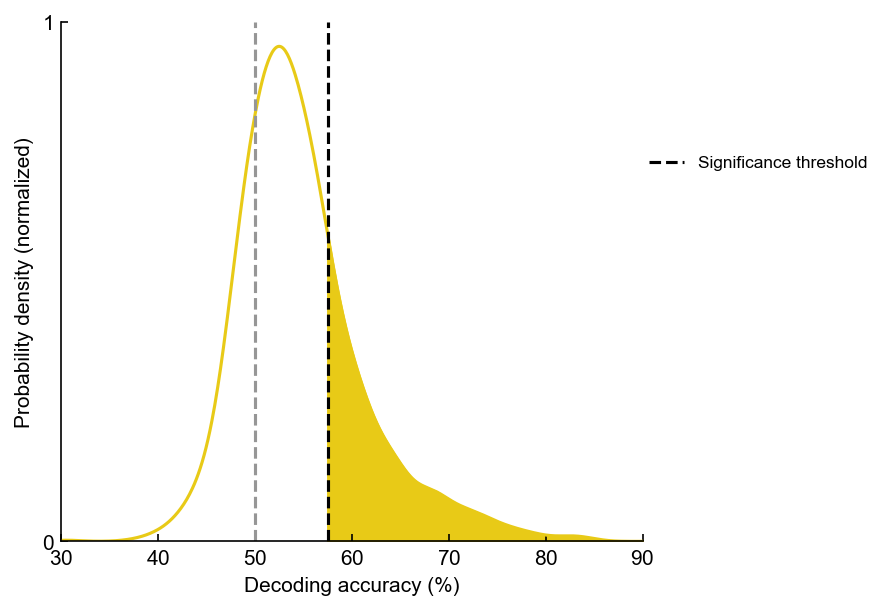

In [24]:
#fig = plt.figure(figsize=(4,4.5))
fig, ax = plt.subplots(figsize=(5,4.5))
#gs = fig.add_gridspec(2,1,wspace=0.25,hspace=0.5)
#axs = [plt.subplot(gs[i,j]) for i,j in product(range(2),range(1))]
axs = [ax]

axs[0].plot(x_range,stim_KDE.evaluate(x_range),color=STIM_COLOR)
#axs[1].plot(x_range,choice_KDE.evaluate(x_range),color=CHOICE_COLOR)

x_range_stim_TEs = np.linspace(task_encoder_threshold_s*100,100,1000)
axs[0].fill_between(x_range_stim_TEs,stim_KDE.evaluate(x_range_stim_TEs),color=STIM_COLOR)
x_range_choice_TEs = np.linspace(task_encoder_threshold_c*100,100,1000)
#axs[1].fill_between(x_range_choice_TEs,choice_KDE.evaluate(x_range_choice_TEs),color=CHOICE_COLOR)

axs[0].axvline(task_encoder_threshold_s*100,color='k',linestyle='--')
#axs[1].axvline(task_encoder_threshold_c*100,color='k',linestyle='--')

for ax in axs:
    ax.axvline(50,color=GOOD_GREY,linestyle='--')
    
    ax.set_xlim([30,90])
    ax.set_xlabel('Decoding accuracy (%)')

    ax.set_ylim([0,ax.get_ylim()[1]])
    ax.set_yticks([0,ax.get_ylim()[1]])
    ax.set_yticklabels([0,1])
    #ax.get_yaxis().set_visible(False)
    #ax.spines['left'].set_visible(False)
    ax.set_ylabel('Probability density (normalized)')

#axs[0].plot([],[],color=STIM_COLOR,label='stimulus')
#axs[0].plot([],[],color=CHOICE_COLOR,label='choice')
axs[0].axvline(np.nan,color='k',linestyle='--',label='Significance threshold')
#axs[0].axvline(np.nan,color=GOOD_GREY,linestyle='--',label='Chance')

lgd = axs[0].legend(frameon=False,loc=(1,0.7))

In [25]:
data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]

In [26]:
FRData = SimpleNamespace()
FRData.preearly = FRmod_preearly
FRData.prelate = FRmod_prelate
FRData.preexpert = FRmod_preexpert
FRData.postearly = FRmod_postearly
FRData.postlate = FRmod_postlate
FRData.postexpert = FRmod_postexpert

In [29]:
ilep.nonparametricIndependentStatsCompareToPrevious(FRData)
pass

            Source            SS     DF          MS         F     p-unc  \
0            phase    368.199001    3.0  122.733000  3.183849  0.023909   
1          context     10.705645    1.0   10.705645  0.277718  0.598507   
2  phase * context    413.249011    3.0  137.749670  3.573400  0.014187   
3         Residual  14725.575681  382.0   38.548627       NaN       NaN   

        np2  
0  0.024394  
1  0.000726  
2  0.027297  
3       NaN  

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.000056  0.000222 -0.504517
8     post-late  baseline  experimental  0.722678  0.722678  0.270265
9    pre-expert  baseline  experimental  0.353085  0.489437  0.005051
10     pre-late  baseline  experimental  0.367078  0.489437  0.132565
key preearly has 22 non-nan elements
key prelate has 33 non-nan elements
key preexpert has 87 non-nan elements
key postearly has 38 non-nan elements
key postlate has 40 non-nan elements
key postexpert ha

In [30]:
ilep.nonparametricIndependentStatsCompareToOwnEarly(FRData)
pass

            Source            SS     DF          MS         F     p-unc  \
0            phase    612.178054    3.0  204.059351  4.007188  0.007930   
1          context     38.933429    1.0   38.933429  0.764550  0.382477   
2  phase * context    114.758743    3.0   38.252914  0.751187  0.522217   
3         Residual  18790.706265  369.0   50.923323       NaN       NaN   

        np2  
0  0.031551  
1  0.002068  
2  0.006070  
3       NaN  

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.002600  0.010401 -0.059040
8     post-late  baseline  experimental  0.722678  0.722678  0.270265
9    pre-expert  baseline  experimental  0.647850  0.722678  0.165118
10     pre-late  baseline  experimental  0.367078  0.722678  0.132565
key preearly has 22 non-nan elements
key prelate has 33 non-nan elements
key preexpert has 87 non-nan elements
key postearly has 38 non-nan elements
key postlate has 40 non-nan elements
key postexpert ha

In [24]:

# 0.05 = *
# 0.01 = **
# 0.001 = ***
# 0.0001 = ****

In [25]:
#Task encoders decoding

In [31]:
CR_Stim_Dec_preearly = []
CR_Stim_Dec_prelate = []
CR_Stim_Dec_preexpert = []
CR_Stim_Dec_postearly = []
CR_Stim_Dec_postlate = []
CR_Stim_Dec_postexpert = []

NCR_Stim_Dec_preearly = []
NCR_Stim_Dec_prelate = []
NCR_Stim_Dec_preexpert = []
NCR_Stim_Dec_postearly = []
NCR_Stim_Dec_postlate = []
NCR_Stim_Dec_postexpert = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    stim_acc = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    choice_acc = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    
    if getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control') > 0.05:
        stim_acc = np.nan
        continue
    if getDataPoint(dec_df,session,clust,'response','pval_synthetic_control') > 0.05:
        choice_acc = np.nan
        continue
        
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    except Exception as e:
        continue
        
    if stim_acc < task_encoder_threshold_s:
        continue
    
    if EILphases[idx] == 'pre early':
        if FRmod >= 2.3:
            CR_Stim_Dec_preearly.append(stim_acc)
        else:
            NCR_Stim_Dec_preearly.append(stim_acc)
    elif EILphases[idx] == 'pre late':
        if FRmod >= 2.3:
            CR_Stim_Dec_prelate.append(stim_acc)
        else:
            NCR_Stim_Dec_prelate.append(stim_acc)
    elif EILphases[idx] == 'pre expert':
        if FRmod >= 2.3:
            CR_Stim_Dec_preexpert.append(stim_acc)
        else:
            NCR_Stim_Dec_preexpert.append(stim_acc)
    elif EILphases[idx] == 'post early':
        if FRmod >= 2.3:
            CR_Stim_Dec_postearly.append(stim_acc)
        else:
            NCR_Stim_Dec_postearly.append(stim_acc)
    elif EILphases[idx] == 'post late':
        if FRmod >= 2.3:
            CR_Stim_Dec_postlate.append(stim_acc)
        else:
            NCR_Stim_Dec_postlate.append(stim_acc)
    elif EILphases[idx] == 'post expert':
        if FRmod >= 2.3:
            CR_Stim_Dec_postexpert.append(stim_acc)
        else:
            NCR_Stim_Dec_postexpert.append(stim_acc)
        
CR_Stim_Dec_preearly = ilep.rmnan(np.array(CR_Stim_Dec_preearly))
CR_Stim_Dec_prelate = ilep.rmnan(np.array(CR_Stim_Dec_prelate))
CR_Stim_Dec_preexpert = ilep.rmnan(np.array(CR_Stim_Dec_preexpert))
CR_Stim_Dec_postearly = ilep.rmnan(np.array(CR_Stim_Dec_postearly))
CR_Stim_Dec_postlate = ilep.rmnan(np.array(CR_Stim_Dec_postlate))
CR_Stim_Dec_postexpert = ilep.rmnan(np.array(CR_Stim_Dec_postexpert))

NCR_Stim_Dec_preearly = ilep.rmnan(np.array(NCR_Stim_Dec_preearly))
NCR_Stim_Dec_prelate = ilep.rmnan(np.array(NCR_Stim_Dec_prelate))
NCR_Stim_Dec_preexpert = ilep.rmnan(np.array(NCR_Stim_Dec_preexpert))
NCR_Stim_Dec_postearly = ilep.rmnan(np.array(NCR_Stim_Dec_postearly))
NCR_Stim_Dec_postlate = ilep.rmnan(np.array(NCR_Stim_Dec_postlate))
NCR_Stim_Dec_postexpert = ilep.rmnan(np.array(NCR_Stim_Dec_postexpert))

1624it [00:39, 41.16it/s]


meta NOT subset; don't know how to subset; dropped


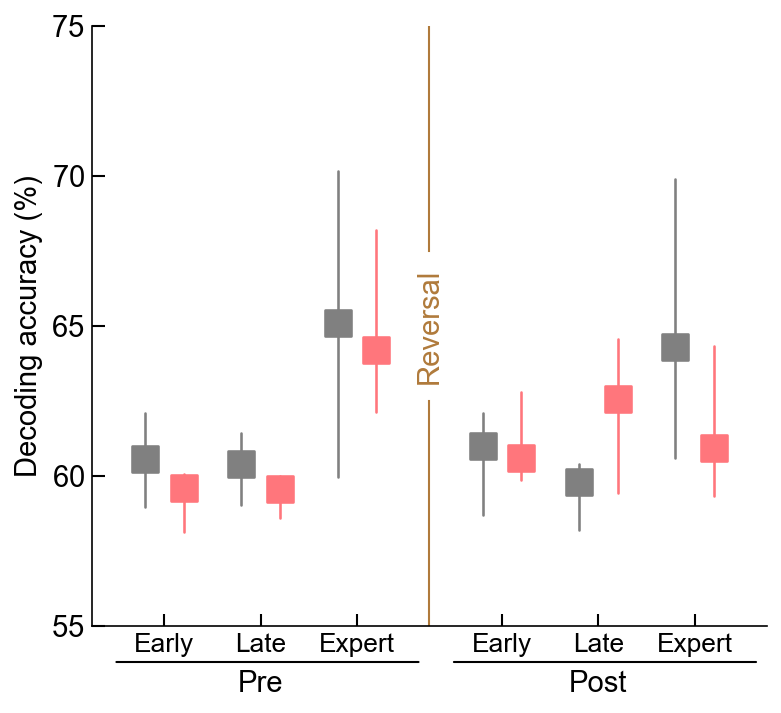

In [32]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(4.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
wid = 0.2

################################################################################################################

for idx,(CR_Stim_Dec,p) in enumerate(zip([CR_Stim_Dec_preearly,CR_Stim_Dec_prelate,CR_Stim_Dec_preexpert,CR_Stim_Dec_postearly,CR_Stim_Dec_postlate,CR_Stim_Dec_postexpert],[-1,-1,-1,1,1,1])):
    Q1, median, Q3 = (np.percentile(ilep.rmnan(CR_Stim_Dec)*100, q) for q in [25, 50, 75])
    summary_size=150
    summary_width=1.25
    eye_color=CR_COLOR
    border_color=CR_COLOR
    ax.scatter([idx-wid+p*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='s')
    ax.plot([idx+-wid+p*switch_offset]*2, [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

for idx,(NCR_Stim_Dec,p) in enumerate(zip([NCR_Stim_Dec_preearly,NCR_Stim_Dec_prelate,NCR_Stim_Dec_preexpert,NCR_Stim_Dec_postearly,NCR_Stim_Dec_postlate,NCR_Stim_Dec_postexpert],[-1,-1,-1,1,1,1])):
    Q1, median, Q3 = (np.percentile(ilep.rmnan(NCR_Stim_Dec)*100, q) for q in [25, 50, 75])
    summary_size=150
    summary_width=1.25
    eye_color=NCR_COLOR
    border_color=NCR_COLOR
    ax.scatter([idx+wid+p*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='s')
    ax.plot([idx+wid+p*switch_offset]*2, [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

################################################################################################################
labels = ['Early','Late','Expert','Early','Late','Expert']

# ax.set_ylim([45,75])
# ax.set_yticks([45,50,55,60,65,70,75])
ax.set_ylim([55,75])
ax.set_yticks([55,60,65,70,75])
ylab = ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Multi-region\\Decoding\\TE stimulus decoding 300.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [34]:
data_dec = SimpleNamespace()
data_dec.preearly = np.abs(NCR_Stim_Dec_preearly)
data_dec.prelate = np.abs(NCR_Stim_Dec_prelate)
data_dec.preexpert = np.abs(NCR_Stim_Dec_preexpert)
data_dec.postearly = np.abs(NCR_Stim_Dec_postearly)
data_dec.postlate = np.abs(NCR_Stim_Dec_postlate)
data_dec.postexpert = np.abs(NCR_Stim_Dec_postexpert)

data_dec2 = SimpleNamespace()
data_dec2.preearly = np.abs(CR_Stim_Dec_preearly)
data_dec2.prelate = np.abs(CR_Stim_Dec_prelate)
data_dec2.preexpert = np.abs(CR_Stim_Dec_preexpert)
data_dec2.postearly = np.abs(CR_Stim_Dec_postearly)
data_dec2.postlate = np.abs(CR_Stim_Dec_postlate)
data_dec2.postexpert = np.abs(CR_Stim_Dec_postexpert)
ilep.nonparametricIndependentStatsCompareToOther(data_dec,data_dec2)
pass

            Source        SS     DF        MS          F         p-unc  \
0            phase  0.152351    5.0  0.030470  11.090984  8.214206e-10   
1          context  0.001392    1.0  0.001392   0.506723  4.771180e-01   
2  phase * context  0.023337    5.0  0.004667   1.698904  1.346691e-01   
3         Residual  0.818691  298.0  0.002747        NaN           NaN   

        np2  
0  0.156894  
1  0.001698  
2  0.027715  
3       NaN  

          phase  A  B     p-unc    p-corr    hedges
16   post-early  A  B  0.634657  0.761588  0.219884
17  post-expert  A  B  0.051799  0.155396 -0.596644
18    post-late  A  B  0.042584  0.155396  0.872448
19    pre-early  A  B  0.267212  0.400818 -0.520054
20   pre-expert  A  B  0.845277  0.845277 -0.143892
21     pre-late  A  B  0.259916  0.400818 -0.214628
key preearly has 6 and 15 non-nan elements
key prelate has 11 and 22 non-nan elements
key preexpert has 19 and 66 non-nan elements
key postearly has 16 and 21 non-nan elements
key postlate has 1

meta NOT subset; don't know how to subset; dropped


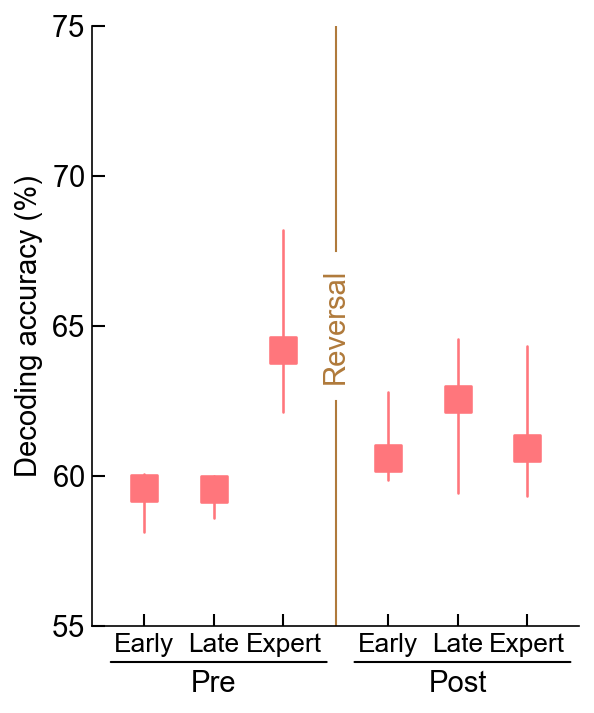

In [35]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
wid = 0

################################################################################################################

# for idx,(CR_Stim_Dec,p) in enumerate(zip([CR_Stim_Dec_preearly,CR_Stim_Dec_prelate,CR_Stim_Dec_preexpert,CR_Stim_Dec_postearly,CR_Stim_Dec_postlate,CR_Stim_Dec_postexpert],[-1,-1,-1,1,1,1])):
#     Q1, median, Q3 = (np.percentile(ilep.rmnan(CR_Stim_Dec)*100, q) for q in [25, 50, 75])
#     summary_size=150
#     summary_width=1.25
#     eye_color=CR_COLOR
#     border_color=CR_COLOR
#     ax.scatter([idx-wid+p*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='s')
#     ax.plot([idx+-wid+p*switch_offset]*2, [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

for idx,(NCR_Stim_Dec,p) in enumerate(zip([NCR_Stim_Dec_preearly,NCR_Stim_Dec_prelate,NCR_Stim_Dec_preexpert,NCR_Stim_Dec_postearly,NCR_Stim_Dec_postlate,NCR_Stim_Dec_postexpert],[-1,-1,-1,1,1,1])):
    Q1, median, Q3 = (np.percentile(ilep.rmnan(NCR_Stim_Dec)*100, q) for q in [25, 50, 75])
    summary_size=150
    summary_width=1.25
    eye_color=NCR_COLOR
    border_color=NCR_COLOR
    ax.scatter([idx+wid+p*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='s')
    ax.plot([idx+wid+p*switch_offset]*2, [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

################################################################################################################
labels = ['Early','Late','Expert','Early','Late','Expert']

# ax.set_ylim([45,75])
# ax.set_yticks([45,50,55,60,65,70,75])
ax.set_ylim([55,75])
ax.set_yticks([55,60,65,70,75])
ylab = ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Multi-region\\Decoding\\TE NCR stimulus decoding 300.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

meta NOT subset; don't know how to subset; dropped


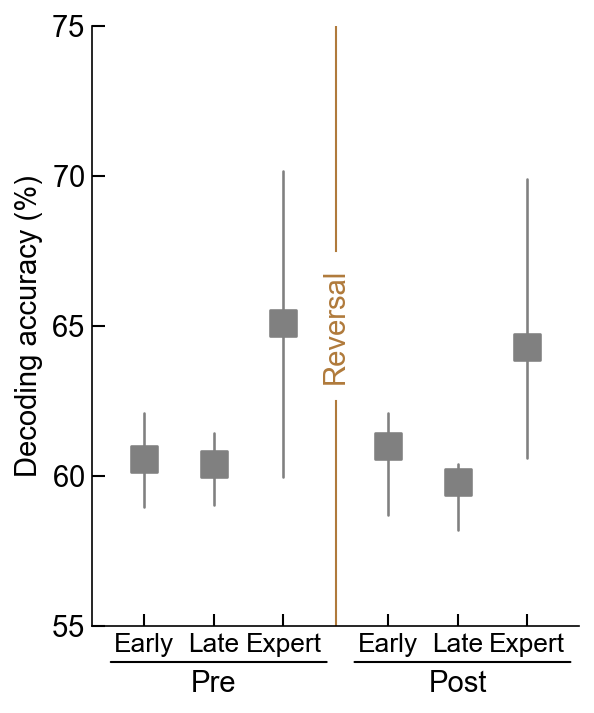

In [36]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
wid = 0

################################################################################################################

for idx,(CR_Stim_Dec,p) in enumerate(zip([CR_Stim_Dec_preearly,CR_Stim_Dec_prelate,CR_Stim_Dec_preexpert,CR_Stim_Dec_postearly,CR_Stim_Dec_postlate,CR_Stim_Dec_postexpert],[-1,-1,-1,1,1,1])):
    Q1, median, Q3 = (np.percentile(ilep.rmnan(CR_Stim_Dec)*100, q) for q in [25, 50, 75])
    summary_size=150
    summary_width=1.25
    eye_color=CR_COLOR
    border_color=CR_COLOR
    ax.scatter([idx-wid+p*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='s')
    ax.plot([idx+-wid+p*switch_offset]*2, [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

# for idx,(NCR_Stim_Dec,p) in enumerate(zip([NCR_Stim_Dec_preearly,NCR_Stim_Dec_prelate,NCR_Stim_Dec_preexpert,NCR_Stim_Dec_postearly,NCR_Stim_Dec_postlate,NCR_Stim_Dec_postexpert],[-1,-1,-1,1,1,1])):
#     Q1, median, Q3 = (np.percentile(ilep.rmnan(NCR_Stim_Dec)*100, q) for q in [25, 50, 75])
#     summary_size=150
#     summary_width=1.25
#     eye_color=NCR_COLOR
#     border_color=NCR_COLOR
#     ax.scatter([idx+wid+p*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='s')
#     ax.plot([idx+wid+p*switch_offset]*2, [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

################################################################################################################
labels = ['Early','Late','Expert','Early','Late','Expert']

# ax.set_ylim([45,75])
# ax.set_yticks([45,50,55,60,65,70,75])
ax.set_ylim([55,75])
ax.set_yticks([55,60,65,70,75])
ylab = ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Multi-region\\Decoding\\TE CR stimulus decoding 300.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [37]:
# 0.05 = *
# 0.01 = **
# 0.001 = ***
# 0.0001 = ****

In [42]:
data_dec = SimpleNamespace()
data_dec.preearly = np.abs(NCR_Stim_Dec_preearly)
data_dec.prelate = np.abs(NCR_Stim_Dec_prelate)
data_dec.preexpert = np.abs(NCR_Stim_Dec_preexpert)
data_dec.postearly = np.abs(NCR_Stim_Dec_postearly)
data_dec.postlate = np.abs(NCR_Stim_Dec_postlate)
data_dec.postexpert = np.abs(NCR_Stim_Dec_postexpert)
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec)


            Source        SS    DF        MS         F     p-unc       np2
0            phase  0.013944   3.0  0.004648  2.499885  0.064463  0.076139
1          context  0.004499   1.0  0.004499  2.419864  0.123276  0.025903
2  phase * context  0.013245   3.0  0.004415  2.374586  0.075289  0.072600
3         Residual  0.169192  91.0  0.001859       NaN       NaN       NaN

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.750832  0.807531  0.168147
8     post-late  baseline  experimental  0.762839  0.807531 -0.001415
9    pre-expert  baseline  experimental  0.001680  0.006720 -1.205665
10     pre-late  baseline  experimental  0.807531  0.807531 -0.205625
key preearly has 6 non-nan elements
key prelate has 11 non-nan elements
key preexpert has 19 non-nan elements
key postearly has 16 non-nan elements
key postlate has 12 non-nan elements
key postexpert has 12 non-nan elements


,Contrast,phase,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,phase,-,post-expert,post-late,False,False,337.0,two-sided,0.992675,0.992675,fdr_bh,-0.071525
1,phase,-,post-expert,pre-expert,False,False,328.0,two-sided,0.583455,0.700146,fdr_bh,-0.197471
2,phase,-,post-expert,pre-late,False,False,281.0,two-sided,0.042929,0.085857,fdr_bh,0.708523
3,phase,-,post-late,pre-expert,False,False,374.0,two-sided,0.478942,0.700146,fdr_bh,-0.103457
4,phase,-,post-late,pre-late,False,False,337.0,two-sided,0.021115,0.063345,fdr_bh,0.613434
5,phase,-,pre-expert,pre-late,False,False,374.5,two-sided,0.008400,0.050402,fdr_bh,0.822915
6,context,-,baseline,experimental,False,False,971.5,two-sided,0.087682,NaN,NaN,-0.265504
7,phase * context,post-expert,baseline,experimental,False,False,78.0,two-sided,0.750832,0.807531,fdr_bh,0.168147
8,phase * context,post-late,baseline,experimental,False,False,89.0,two-sided,0.762839,0.807531,fdr_bh,-0.001415
9,phase * context,pre-expert,baseline,experimental,False,False,31.0,two-sided,0.001680,0.006720,fdr_bh,-1.205665


In [43]:
ilep.nonparametricIndependentStatsCompareToOwnEarly(data_dec)

            Source        SS    DF        MS         F     p-unc       np2
0            phase  0.015331   3.0  0.005110  2.300026  0.082649  0.071208
1          context  0.002296   1.0  0.002296  1.033328  0.312103  0.011351
2  phase * context  0.012071   3.0  0.004024  1.810953  0.150828  0.056929
3         Residual  0.199965  90.0  0.002222       NaN       NaN       NaN

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  1.000000  1.000000  0.127973
8     post-late  baseline  experimental  0.762839  1.000000 -0.001415
9    pre-expert  baseline  experimental  0.004382  0.017527 -1.290019
10     pre-late  baseline  experimental  0.807531  1.000000 -0.205625
key preearly has 6 non-nan elements
key prelate has 11 non-nan elements
key preexpert has 19 non-nan elements
key postearly has 16 non-nan elements
key postlate has 12 non-nan elements
key postexpert has 12 non-nan elements


,Contrast,phase,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,phase,-,post-expert,post-late,False,False,379.0,two-sided,0.837657,0.837657,fdr_bh,-0.056256
1,phase,-,post-expert,pre-expert,False,False,270.0,two-sided,0.156634,0.234951,fdr_bh,-0.263466
2,phase,-,post-expert,pre-late,False,False,332.0,two-sided,0.028606,0.057213,fdr_bh,0.565362
3,phase,-,post-late,pre-expert,False,False,283.0,two-sided,0.236074,0.283288,fdr_bh,-0.199452
4,phase,-,post-late,pre-late,False,False,337.0,two-sided,0.021115,0.057213,fdr_bh,0.613434
5,phase,-,pre-expert,pre-late,False,False,326.0,two-sided,0.003776,0.022654,fdr_bh,0.954348
6,context,-,baseline,experimental,False,False,944.0,two-sided,0.081979,NaN,NaN,-0.204853
7,phase * context,post-expert,baseline,experimental,False,False,96.0,two-sided,1.000000,1.000000,fdr_bh,0.127973
8,phase * context,post-late,baseline,experimental,False,False,89.0,two-sided,0.762839,1.000000,fdr_bh,-0.001415
9,phase * context,pre-expert,baseline,experimental,False,False,14.0,two-sided,0.004382,0.017527,fdr_bh,-1.290019


In [48]:
data_dec2 = SimpleNamespace()
data_dec2.preearly = np.abs(CR_Stim_Dec_preearly)
data_dec2.prelate = np.abs(CR_Stim_Dec_prelate)
data_dec2.preexpert = np.abs(CR_Stim_Dec_preexpert)
data_dec2.postearly = np.abs(CR_Stim_Dec_postearly)
data_dec2.postlate = np.abs(CR_Stim_Dec_postlate)
data_dec2.postexpert = np.abs(CR_Stim_Dec_postexpert)
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec2)
pass
# 0.05 = *
# 0.01 = **
# 0.001 = ***
# 0.0001 = ****

            Source        SS     DF        MS          F     p-unc       np2
0            phase  0.060329    3.0  0.020110   7.848534  0.000048  0.079400
1          context  0.060268    1.0  0.060268  23.521827  0.000002  0.079326
2  phase * context  0.058415    3.0  0.019472   7.599530  0.000067  0.077075
3         Residual  0.699486  273.0  0.002562        NaN       NaN       NaN

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.000001  0.000005 -0.990908
8     post-late  baseline  experimental  0.171541  0.228722  0.494069
9    pre-expert  baseline  experimental  0.000344  0.000687 -0.973679
10     pre-late  baseline  experimental  0.987659  0.987659  0.011063
key preearly has 15 non-nan elements
key prelate has 22 non-nan elements
key preexpert has 66 non-nan elements
key postearly has 21 non-nan elements
key postlate has 25 non-nan elements
key postexpert has 85 non-nan elements


In [49]:
ilep.nonparametricIndependentStatsCompareToOwnEarly(data_dec2)
pass
# 0.05 = *
# 0.01 = **
# 0.001 = ***
# 0.0001 = ****

            Source        SS     DF        MS          F     p-unc       np2
0            phase  0.076685    3.0  0.025562   9.334914  0.000007  0.096566
1          context  0.028199    1.0  0.028199  10.298072  0.001498  0.037819
2  phase * context  0.040545    3.0  0.013515   4.935621  0.002374  0.053492
3         Residual  0.717427  262.0  0.002738        NaN       NaN       NaN

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.002399  0.004797 -0.682115
8     post-late  baseline  experimental  0.171541  0.228722  0.494069
9    pre-expert  baseline  experimental  0.001247  0.004797 -0.932340
10     pre-late  baseline  experimental  0.987659  0.987659  0.011063
key preearly has 15 non-nan elements
key prelate has 22 non-nan elements
key preexpert has 66 non-nan elements
key postearly has 21 non-nan elements
key postlate has 25 non-nan elements
key postexpert has 85 non-nan elements


# Stimulus

meta NOT subset; don't know how to subset; dropped


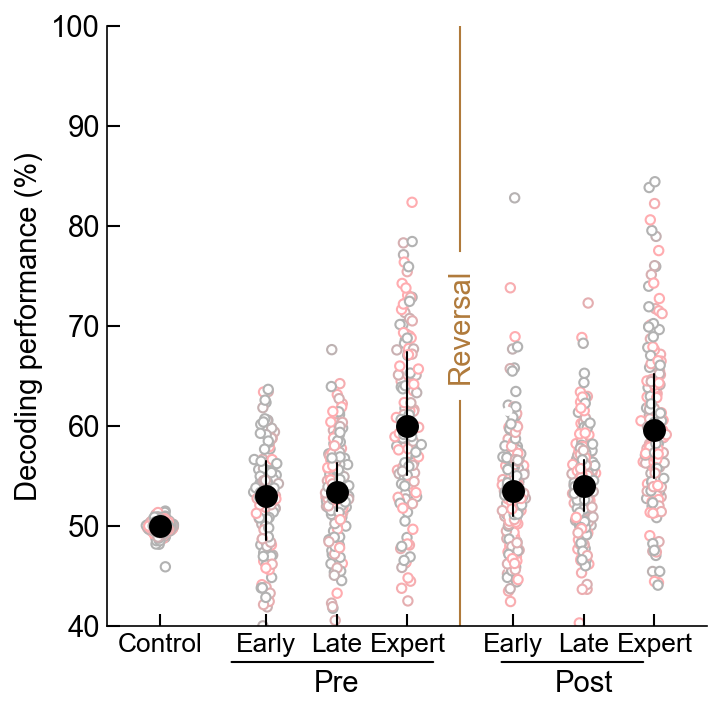

In [50]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(4, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

size = 20
summary_size=100
summary_width=1#0.75

mn = 2.3
spread = 2.5
    
###
    
FRmod_baseline_median = 2.3
data = [Control_Stim_Dec_overall,Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
FRmoddata = [FRmod_Stim_overall,FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
labels = ['Control','Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-3,-1,-1,-1,1,1,1]))]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.4,minjitter=0.075)
#colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)
colors = NCR_CR_cmap( (np.concatenate(FRmoddata)-(mn-spread/2))/ (spread) )

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10)

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-3,-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= 'k'#NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
ax.set_ylim([0.4,1])
ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['40','50','60','70','80','90','100'])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.75-3*switch_offset,6.75+switch_offset])
ax.set_xticks([0-3*switch_offset,1-switch_offset,2-switch_offset,3-switch_offset,4+switch_offset,5+switch_offset,6+switch_offset])
ax.set_xticklabels(labels)

xtick_pos_con = ax.get_xticks()[0]
xtick_pos_pre = ax.get_xticks()[2]
xtick_pos_post = ax.get_xticks()[5]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
# t1 = ax.text(xtick_pos_con, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.2, -stdyfrac), xycoords='axes fraction', xytext=(0.55, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.65, -stdyfrac), xycoords='axes fraction', xytext=(0.9, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(3.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([3.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([3.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Multi-region\\Decoding\\M2_stimulus 300.pdf'),transparent=False,facecolor="white",dpi=400, bbox_inches='tight')

meta NOT subset; don't know how to subset; dropped


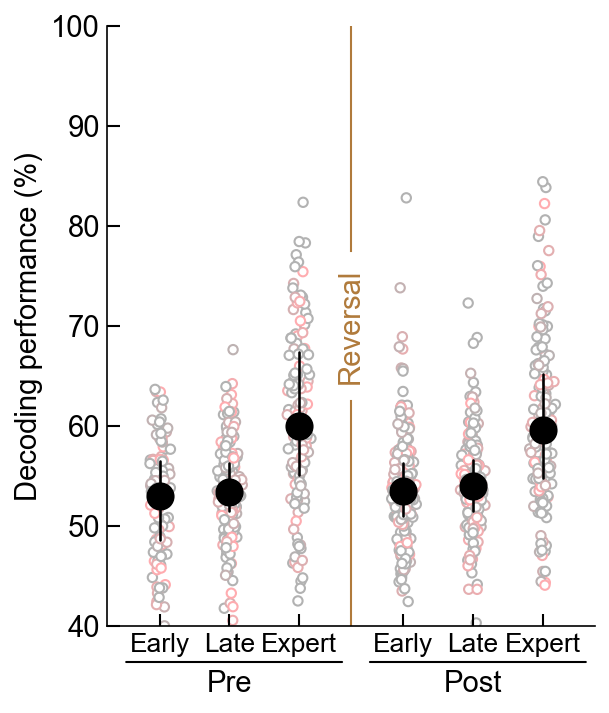

In [51]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 2.3
spread = 2.5
    
###
    
FRmod_baseline_median = 2.3

data = [Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
FRmoddata = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.4,minjitter=0.075)
#colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)
colors = NCR_CR_cmap( (np.concatenate(FRmoddata)-(mn-spread/2))/ (spread) )

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10)

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= 'k'#NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
ax.set_ylim([0.4,1])
ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['40','50','60','70','80','90','100'])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
# t1 = ax.text(xtick_pos_con, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Multi-region\\Decoding\\M2_stimulus 300.pdf'),transparent=False,facecolor="white",dpi=400, bbox_inches='tight')

In [52]:
data_dec = SimpleNamespace()
data_dec.preearly = Stim_Dec_preearly
data_dec.prelate = Stim_Dec_prelate
data_dec.preexpert = Stim_Dec_preexpert
data_dec.postearly = Stim_Dec_postearly
data_dec.postlate = Stim_Dec_postlate
data_dec.postexpert = Stim_Dec_postexpert
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec)
pass


            Source        SS      DF        MS           F         p-unc  \
0            phase  0.470114     3.0  0.156705   48.297968  8.576324e-30   
1          context  0.455286     1.0  0.455286  140.323565  5.230653e-31   
2  phase * context  0.346094     3.0  0.115365   35.556580  3.390246e-22   
3         Residual  4.857080  1497.0  0.003245         NaN           NaN   

        np2  
0  0.088248  
1  0.085703  
2  0.066516  
3       NaN  

          phase         A             B         p-unc        p-corr    hedges
7   post-expert  baseline  experimental  5.542207e-17  1.625709e-16 -0.998923
8     post-late  baseline  experimental  1.393361e-01  1.857814e-01 -0.091892
9    pre-expert  baseline  experimental  8.128544e-17  1.625709e-16 -1.096206
10     pre-late  baseline  experimental  1.994261e-01  1.994261e-01 -0.176272
key preearly has 120 non-nan elements
key prelate has 208 non-nan elements
key preexpert has 134 non-nan elements
key postearly has 242 non-nan elements
key p

In [53]:
1.857814e-01

0.1857814

In [55]:
data_dec = SimpleNamespace()
data_dec.preearly = Stim_Dec_preearly
data_dec.prelate = Stim_Dec_prelate
data_dec.preexpert = Stim_Dec_preexpert
data_dec.postearly = Stim_Dec_postearly
data_dec.postlate = Stim_Dec_postlate
data_dec.postexpert = Stim_Dec_postexpert
ilep.nonparametricIndependentStatsCompareToOwnEarly(data_dec)
pass

            Source        SS      DF        MS           F         p-unc  \
0            phase  0.420356     3.0  0.140119   40.627514  3.388455e-25   
1          context  0.468336     1.0  0.468336  135.794392  4.778400e-30   
2  phase * context  0.395984     3.0  0.131995   38.271965  8.623351e-24   
3         Residual  4.942218  1433.0  0.003449         NaN           NaN   

        np2  
0  0.078387  
1  0.086560  
2  0.074179  
3       NaN  

          phase         A             B         p-unc        p-corr    hedges
7   post-expert  baseline  experimental  8.915951e-20  3.566380e-19 -1.040495
8     post-late  baseline  experimental  1.393361e-01  1.857814e-01 -0.091892
9    pre-expert  baseline  experimental  1.214893e-14  2.429785e-14 -1.097134
10     pre-late  baseline  experimental  1.994261e-01  1.994261e-01 -0.176272
key preearly has 120 non-nan elements
key prelate has 208 non-nan elements
key preexpert has 134 non-nan elements
key postearly has 242 non-nan elements
key p

# Choice

meta NOT subset; don't know how to subset; dropped


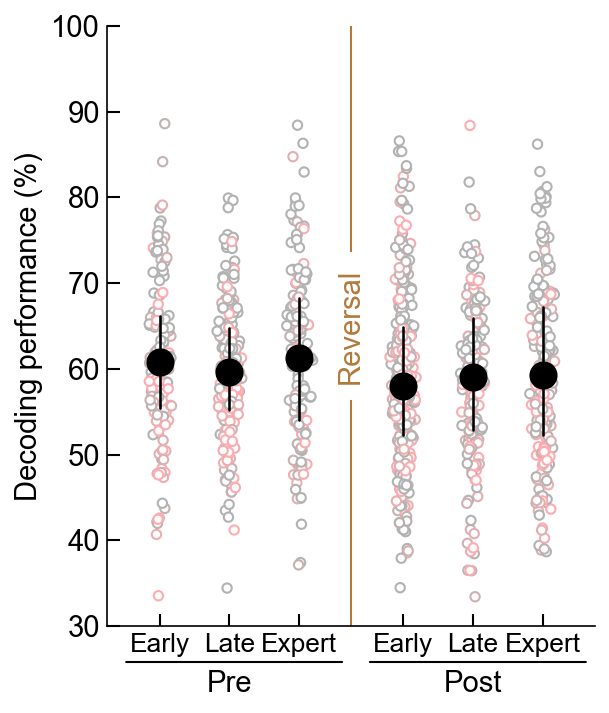

In [9]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

FRmod_baseline_median = 0.7682453632156631
mn = FRmod_baseline_median
spread =1
    
###
    

Choicemod = [ChoiceMod_preearly,ChoiceMod_prelate,ChoiceMod_preexpert,ChoiceMod_postearly,ChoiceMod_postlate,ChoiceMod_postexpert]
data = [Choice_Dec_preearly,Choice_Dec_prelate,Choice_Dec_preexpert,Choice_Dec_postearly,Choice_Dec_postlate,Choice_Dec_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.4,minjitter=0.075)
colors = NCR_CR_cmap( (np.concatenate(Choicemod)-(mn-spread/2))/ (spread) )

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10)

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= 'k'
    border_color = 'k'

    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
ax.set_ylim([0.3,1])
ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['30','40','50','60','70','80','90','100'])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)

t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\PHRC_Dual\\Decoding\\M2_choice_no control.pdf'),transparent=False,facecolor="white",dpi=400, bbox_inches='tight')

In [21]:
data_dec = SimpleNamespace()
data_dec.preearly = Choice_Dec_preearly
data_dec.prelate = Choice_Dec_prelate
data_dec.preexpert = Choice_Dec_preexpert
data_dec.postearly = Choice_Dec_postearly
data_dec.postlate = Choice_Dec_postlate
data_dec.postexpert = Choice_Dec_postexpert
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec)
pass


            Source         SS      DF        MS         F     p-unc       np2
0            phase   0.064354     3.0  0.021451  2.528030  0.055828  0.004771
1          context   0.003975     1.0  0.003975  0.468487  0.493784  0.000296
2  phase * context   0.041217     3.0  0.013739  1.619139  0.182999  0.003061
3         Residual  13.423898  1582.0  0.008485       NaN       NaN       NaN

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.548027  0.603731 -0.098192
8     post-late  baseline  experimental  0.603731  0.603731  0.005885
9    pre-expert  baseline  experimental  0.178683  0.428773 -0.186735
10     pre-late  baseline  experimental  0.214387  0.428773  0.144174
key preearly has 139 non-nan elements
key prelate has 218 non-nan elements
key preexpert has 144 non-nan elements
key postearly has 306 non-nan elements
key postlate has 189 non-nan elements
key postexpert has 187 non-nan elements


In [22]:
data_dec = SimpleNamespace()
data_dec.preearly = Choice_Dec_preearly
data_dec.prelate = Choice_Dec_prelate
data_dec.preexpert = Choice_Dec_preexpert
data_dec.postearly = Choice_Dec_postearly
data_dec.postlate = Choice_Dec_postlate
data_dec.postexpert = Choice_Dec_postexpert
ilep.nonparametricIndependentStatsCompareToOwnEarly(data_dec)
pass

            Source         SS      DF        MS         F     p-unc       np2
0            phase   0.114172     3.0  0.038057  4.196794  0.005730  0.007712
1          context   0.000161     1.0  0.000161  0.017736  0.894069  0.000011
2  phase * context   0.023522     3.0  0.007841  0.864631  0.458785  0.001599
3         Residual  14.690433  1620.0  0.009068       NaN       NaN       NaN

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.311142  0.622283 -0.090635
8     post-late  baseline  experimental  0.603731  0.804974  0.005885
9    pre-expert  baseline  experimental  0.855314  0.855314 -0.042863
10     pre-late  baseline  experimental  0.214387  0.622283  0.144174
key preearly has 139 non-nan elements
key prelate has 218 non-nan elements
key preexpert has 144 non-nan elements
key postearly has 306 non-nan elements
key postlate has 189 non-nan elements
key postexpert has 187 non-nan elements


# Old

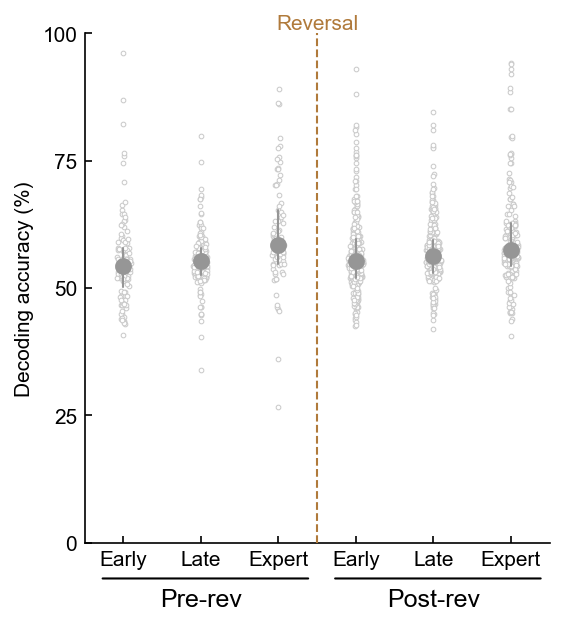

In [9]:
#Firing rate modulation graphs

size=5

#FRmod_baseline_median = np.nanmedian(np.abs(FRmod_preearly))
#print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=GOOD_GREY, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):    
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)

    summary_size=50
    summary_width=1
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
    ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)

ax.set_ylim([0,1])
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_yticklabels(['0','25','50','75','100'])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')


#NORMAL
xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, -0.13304656298982956/1.5, 'Pre-rev', ha='center', va='top', fontsize=12)
ax.text(xtick_pos_post, -0.13304656298982956/1.5, 'Post-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

#fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Stimulus decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

### V3

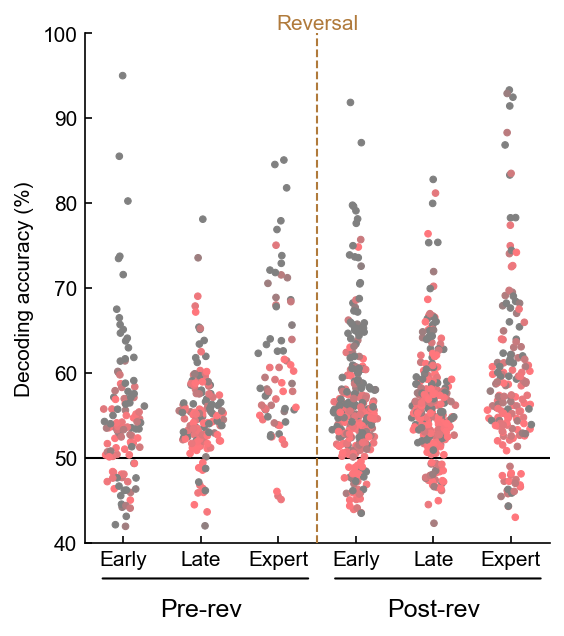

In [23]:
#Firing rate modulation graphs

size=10

#FRmod_baseline_median = np.nanmedian(np.abs(FRmod_preearly))
#print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
FRmoddata = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
#data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.75,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.75,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc=colors, lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):    
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)

    summary_size=50
    summary_width=1
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
#     ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
#     ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

ax.axhline(0.5,color='k',linestyle='-',zorder=-20,lw=1)
ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)

ax.set_ylim([0.4,1])
ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['40','50','60','70','80','90','100'])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

    
# ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')


#NORMAL
xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.01
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Stimulus decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(t1,t2), bbox_inches='tight')

### V4

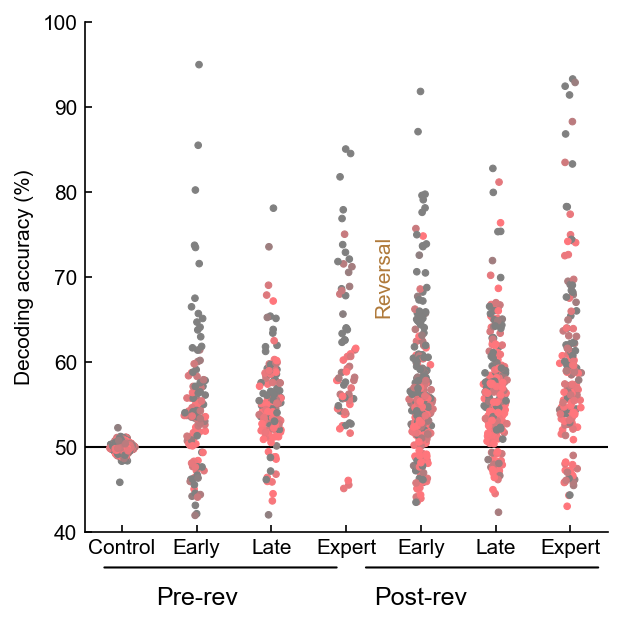

In [18]:
#Firing rate modulation graphs

size=10

#FRmod_baseline_median = np.nanmedian(np.abs(FRmod_preearly))
#print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4.5,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [Control_Stim_Dec_overall,Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
FRmoddata = [FRmod_Stim_overall,FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
#data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Control','Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.35,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.35,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc=colors, lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):    
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)

    summary_size=50
    summary_width=1
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
#     ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
#     ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

ax.axhline(0.5,color='k',linestyle='-',zorder=-20,lw=1)

ax.set_ylim([0.4,1])
ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['40','50','60','70','80','90','100'])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.5,6.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

    
rev = 3.5
size = 0.3
center = np.mean(ax.get_ylim())
ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
#ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
#ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')


#NORMAL
xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.01
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Stimulus decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(t1,t2), bbox_inches='tight')

### V5

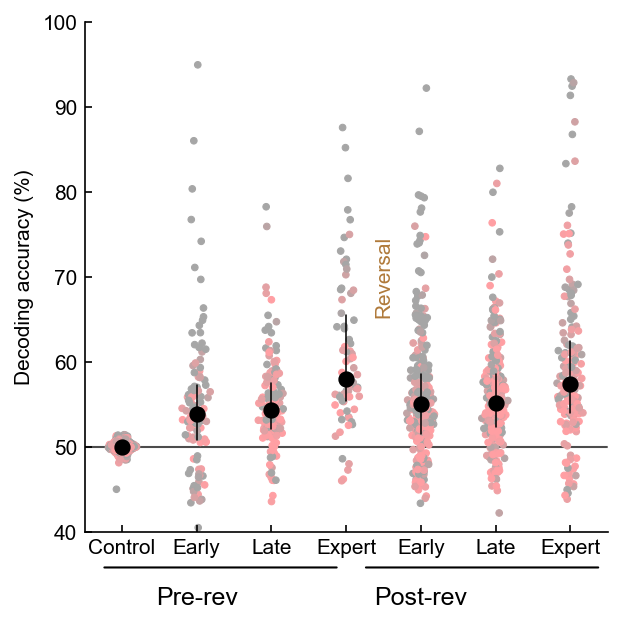

In [27]:
#Firing rate modulation graphs

size=10

#FRmod_baseline_median = np.nanmedian(np.abs(FRmod_preearly))
#print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4.5,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [Control_Stim_Dec_overall,Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
FRmoddata = [FRmod_Stim_overall,FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
#data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Control','Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.4,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc=colors, lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)
    
    border_color = 'k'
    eye_color = 'k'

    summary_size=50
    summary_width=0.75
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
    ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

ax.axhline(0.5,color='k',linestyle='-',zorder=-20,lw=1)

ax.set_ylim([0.4,1])
ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['40','50','60','70','80','90','100'])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.5,6.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

    
rev = 3.5
size = 0.3
center = np.mean(ax.get_ylim())
ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
#ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
#ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')

ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.3,zorder=-5)

#NORMAL
xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.01
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Stimulus decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(t1,t2), bbox_inches='tight')

### V6

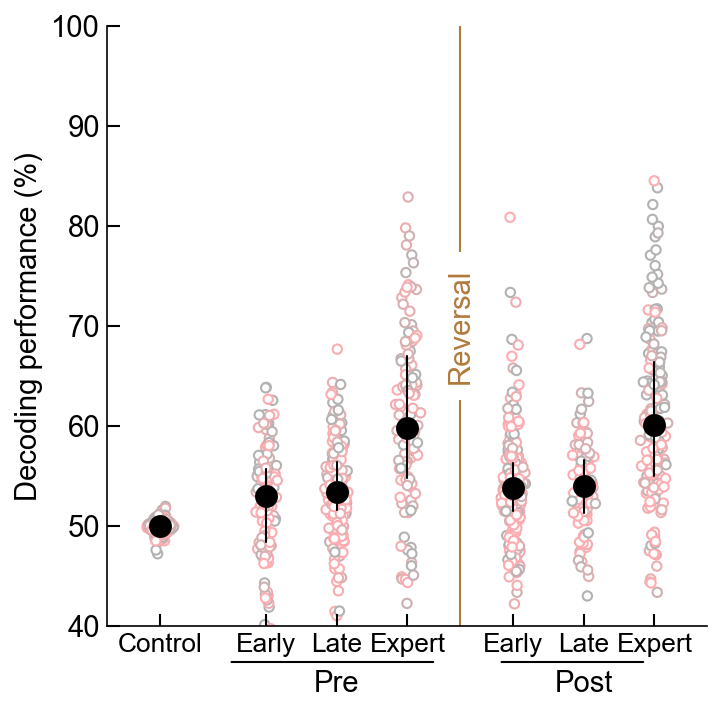

In [16]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(4, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

size = 20
summary_size=100
summary_width=1#0.75

mn = 3.5
spread = 2.5
    
###
    
FRmod_baseline_median = 2.3
data = [Control_Stim_Dec_overall,Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
FRmoddata = [FRmod_Stim_overall,FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
labels = ['Control','Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-3,-1,-1,-1,1,1,1]))]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.4,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10)

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-3,-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= 'k'#NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
ax.set_ylim([0.4,1])
ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['40','50','60','70','80','90','100'])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.75-3*switch_offset,6.75+switch_offset])
ax.set_xticks([0-3*switch_offset,1-switch_offset,2-switch_offset,3-switch_offset,4+switch_offset,5+switch_offset,6+switch_offset])
ax.set_xticklabels(labels)

xtick_pos_con = ax.get_xticks()[0]
xtick_pos_pre = ax.get_xticks()[2]
xtick_pos_post = ax.get_xticks()[5]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
# t1 = ax.text(xtick_pos_con, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.2, -stdyfrac), xycoords='axes fraction', xytext=(0.55, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.65, -stdyfrac), xycoords='axes fraction', xytext=(0.9, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(3.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([3.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([3.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
#fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Stimulus decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

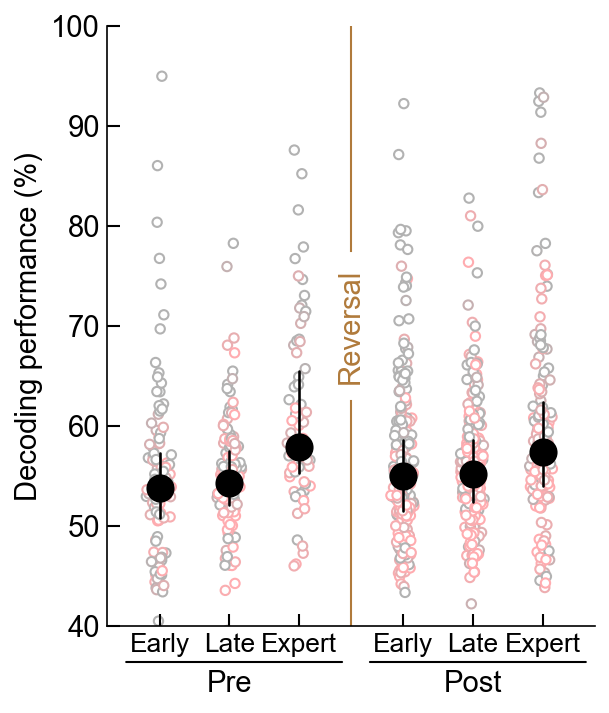

In [10]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 3.5
spread = 2.5
    
###
    
FRmod_baseline_median = 3.5
# data = [Control_Stim_Dec_overall,Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
# FRmoddata = [FRmod_Stim_overall,FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
# labels = ['Control','Early','Late','Expert','Early','Late','Expert']
data = [Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
FRmoddata = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.4,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10)

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= 'k'#NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
ax.set_ylim([0.4,1])
ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['40','50','60','70','80','90','100'])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
# t1 = ax.text(xtick_pos_con, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Stimulus decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8cb982850>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8cb982f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8cb982580>,
 'medians': [<matplotlib.lines.Line2D at 0x1f8cb9885e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f8cb988910>,
 'means': []}

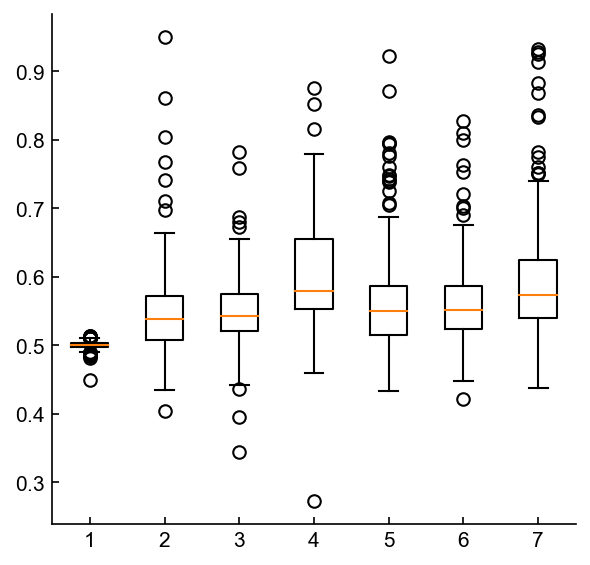

In [31]:
fig, ax = plt.subplots(figsize=(4.5,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [Control_Stim_Dec_overall,Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
data = [ilep.rmnan(d) for d in data]
FRmoddata = [FRmod_Stim_overall,FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
#data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Control','Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

ax.boxplot(data)

In [11]:
data_dec = SimpleNamespace()
data_dec.preearly = Stim_Dec_preearly
data_dec.prelate = Stim_Dec_prelate
data_dec.preexpert = Stim_Dec_preexpert
data_dec.postearly = Stim_Dec_postearly
data_dec.postlate = Stim_Dec_postlate
data_dec.postexpert = Stim_Dec_postexpert
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec)
pass


            Source        SS      DF        MS          F         p-unc  \
0            phase  0.144594     3.0  0.048198   9.379624  3.843466e-06   
1          context  0.112706     1.0  0.112706  21.933285  3.082975e-06   
2  phase * context  0.166567     3.0  0.055522  10.805030  5.047800e-07   
3         Residual  7.569111  1473.0  0.005139        NaN           NaN   

        np2  
0  0.018745  
1  0.014672  
2  0.021532  
3       NaN  

          phase         A             B         p-unc        p-corr    hedges
7   post-expert  baseline  experimental  1.711770e-04  3.423539e-04 -0.442528
8     post-late  baseline  experimental  2.772960e-01  3.697279e-01 -0.013860
9    pre-expert  baseline  experimental  1.017492e-07  4.069968e-07 -0.791652
10     pre-late  baseline  experimental  4.195537e-01  4.195537e-01  0.022022
key preearly has 113 non-nan elements
key prelate has 158 non-nan elements
key preexpert has 74 non-nan elements
key postearly has 294 non-nan elements
key postlat

In [12]:
data_dec = SimpleNamespace()
data_dec.preearly = Stim_Dec_preearly
data_dec.prelate = Stim_Dec_prelate
data_dec.preexpert = Stim_Dec_preexpert
data_dec.postearly = Stim_Dec_postearly
data_dec.postlate = Stim_Dec_postlate
data_dec.postexpert = Stim_Dec_postexpert
ilep.nonparametricIndependentStatsCompareToOwnEarly(data_dec)
pass

            Source        SS      DF        MS          F     p-unc       np2
0            phase  0.146228     3.0  0.048743   8.365905  0.000016  0.016888
1          context  0.108361     1.0  0.108361  18.598516  0.000017  0.012570
2  phase * context  0.157663     3.0  0.052554   9.020100  0.000006  0.018185
3         Residual  8.512286  1461.0  0.005826        NaN       NaN       NaN

          phase         A             B         p-unc    p-corr    hedges
7   post-expert  baseline  experimental  1.316104e-05  0.000026 -0.424158
8     post-late  baseline  experimental  2.772960e-01  0.369728 -0.013860
9    pre-expert  baseline  experimental  8.811250e-07  0.000004 -0.608634
10     pre-late  baseline  experimental  4.195537e-01  0.419554  0.022022
key preearly has 113 non-nan elements
key prelate has 158 non-nan elements
key preexpert has 74 non-nan elements
key postearly has 294 non-nan elements
key postlate has 261 non-nan elements
key postexpert has 162 non-nan elements


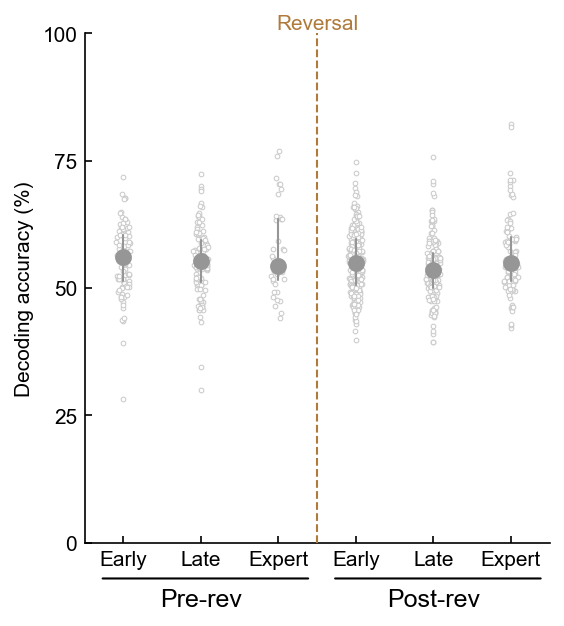

In [11]:
#Firing rate modulation graphs

size=5

#FRmod_baseline_median = np.nanmedian(np.abs(FRmod_preearly))
#print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [Choice_Dec_preearly,Choice_Dec_prelate,Choice_Dec_preexpert,Choice_Dec_postearly,Choice_Dec_postlate,Choice_Dec_postexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=GOOD_GREY, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):    
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)

    summary_size=50
    summary_width=1
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
    ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)

ax.set_ylim([0,1])
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_yticklabels(['0','25','50','75','100'])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')


#NORMAL
xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, -0.13304656298982956/1.5, 'Pre-rev', ha='center', va='top', fontsize=12)
ax.text(xtick_pos_post, -0.13304656298982956/1.5, 'Post-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Choice decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

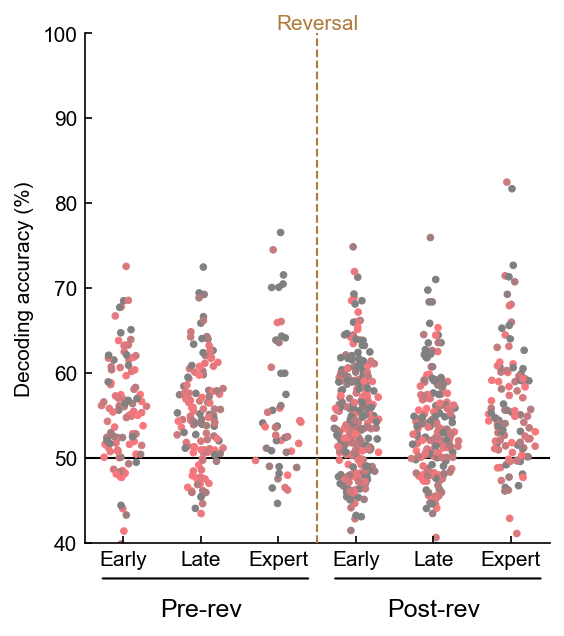

In [24]:
#Firing rate modulation graphs

size=10

#FRmod_baseline_median = np.nanmedian(np.abs(FRmod_preearly))
#print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [Choice_Dec_preearly,Choice_Dec_prelate,Choice_Dec_preexpert,Choice_Dec_postearly,Choice_Dec_postlate,Choice_Dec_postexpert]
Rampingdata = [Ramping_preearly,Ramping_prelate,Ramping_preexpert,Ramping_postearly,Ramping_postlate,Ramping_postexpert]
Rampingdata = [np.abs(d) for d in Rampingdata]
#data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.75,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.75,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(Rampingdata))/3)

ax.scatter(X, Y, s=size, ec=colors, fc=colors, lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):    
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)

    summary_size=50
    summary_width=1
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
#     ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
#     ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

ax.axhline(0.5,color='k',linestyle='-',zorder=-20,lw=1)
ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)

ax.set_ylim([0.4,1])
ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['40','50','60','70','80','90','100'])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

    
# ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')


#NORMAL
xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.01
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Choice decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(t1,t2), bbox_inches='tight')

### V4

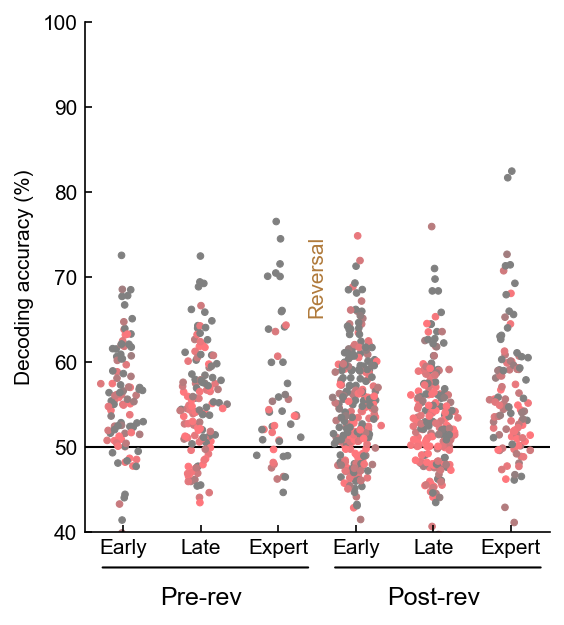

In [18]:
#Firing rate modulation graphs

size=10

#FRmod_baseline_median = np.nanmedian(np.abs(FRmod_preearly))
#print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [Choice_Dec_preearly,Choice_Dec_prelate,Choice_Dec_preexpert,Choice_Dec_postearly,Choice_Dec_postlate,Choice_Dec_postexpert]
FRmoddata = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
Rampingdata = [Ramping_preearly,Ramping_prelate,Ramping_preexpert,Ramping_postearly,Ramping_postlate,Ramping_postexpert]
Rampingdata = [np.abs(d) for d in Rampingdata]
#data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.75,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.75,minjitter=0.075)
#colors = NCR_CR_cmap((np.concatenate(Rampingdata))/3)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc=colors, lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):    
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)

    summary_size=50
    summary_width=1
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
#     ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
#     ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

ax.axhline(0.5,color='k',linestyle='-',zorder=-20,lw=1)

ax.set_ylim([0.4,1])
ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['40','50','60','70','80','90','100'])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

    
rev = 2.5
size = 0.3
center = np.mean(ax.get_ylim())
ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
#ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
#ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')


#NORMAL
xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.01
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Choice decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(t1,t2), bbox_inches='tight')

## V6

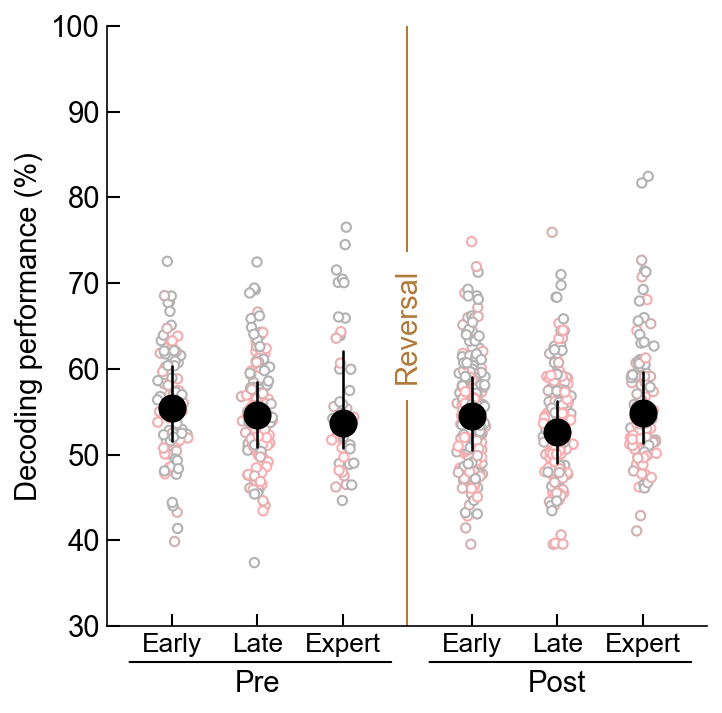

In [25]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(4, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################
size = 20
summary_size=150
summary_width=1.25#0.75

mn = 3.5
spread = 2.5

FRmod_baseline_median = 3.5
data = [Choice_Dec_preearly,Choice_Dec_prelate,Choice_Dec_preexpert,Choice_Dec_postearly,Choice_Dec_postlate,Choice_Dec_postexpert]
FRmoddata = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.4,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10)

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= 'k'#NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
ax.set_ylim([0.3,1])
ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['30','40','50','60','70','80','90','100'])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
# t1 = ax.text(xtick_pos_con, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.98, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Choice decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

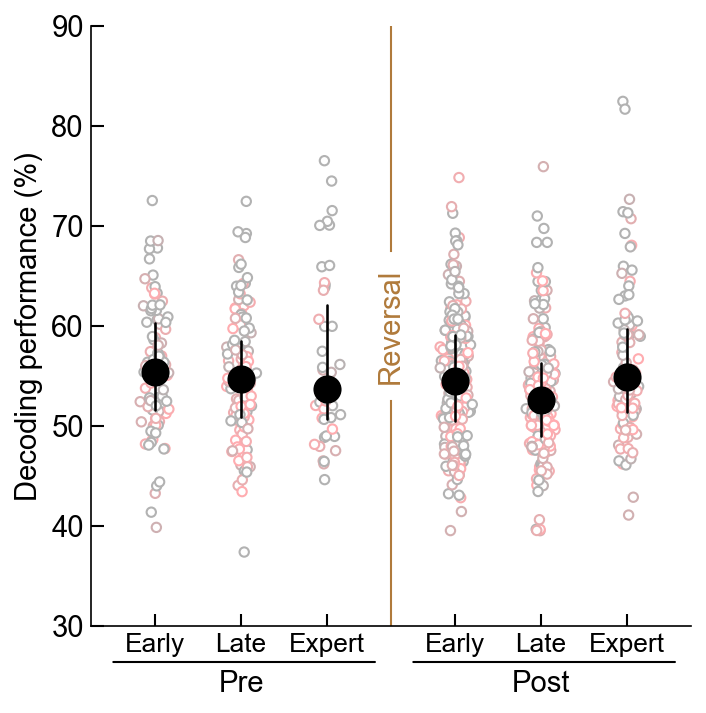

In [13]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(4, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################
size = 20
summary_size=150
summary_width=1.25#0.75

mn = 3.5
spread = 2.5

FRmod_baseline_median = 3.5
data = [Choice_Dec_preearly,Choice_Dec_prelate,Choice_Dec_preexpert,Choice_Dec_postearly,Choice_Dec_postlate,Choice_Dec_postexpert]
FRmoddata = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx + polarity*switch_offset for idx,(l,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1]))]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.4,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=1,zorder=-10)

#Plot summary
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color= 'k'#NCR_CR_cmap((percentCR-40)/20)
    border_color = 'k'#NCR_CR_cmap((percentCR-40)/20)  
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q1 = median + sem(column)
    
    ax.scatter([idx+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+polarity*switch_offset, idx+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.4,zorder=-5)

################################################################################################################
ax.set_ylim([0.3,0.9])
ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax.set_yticklabels(['30','40','50','60','70','80','90'])
ylab = ax.set_ylabel('Decoding performance (%)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
# t1 = ax.text(xtick_pos_con, Yval, 'Control', ha='center', va='bottom', fontsize=stdfont,color='k')
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.98, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Choice decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [14]:
data_dec = SimpleNamespace()
data_dec.preearly = Choice_Dec_preearly
data_dec.prelate = Choice_Dec_prelate
data_dec.preexpert = Choice_Dec_preexpert
data_dec.postearly = Choice_Dec_postearly
data_dec.postlate = Choice_Dec_postlate
data_dec.postexpert = Choice_Dec_postexpert
ilep.nonparametricIndependentStatsCompareToPrevious(data_dec)
pass

            Source        SS      DF        MS         F     p-unc       np2
0            phase  0.026927     3.0  0.008976  2.149652  0.092305  0.005505
1          context  0.000974     1.0  0.000974  0.233255  0.629211  0.000200
2  phase * context  0.096419     3.0  0.032140  7.697315  0.000043  0.019436
3         Residual  4.864368  1165.0  0.004175       NaN       NaN       NaN

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.000519  0.002075 -0.456311
8     post-late  baseline  experimental  0.007236  0.014472  0.250625
9    pre-expert  baseline  experimental  0.817329  0.817329 -0.209005
10     pre-late  baseline  experimental  0.420155  0.560207  0.090530
key preearly has 102 non-nan elements
key prelate has 131 non-nan elements
key preexpert has 47 non-nan elements
key postearly has 254 non-nan elements
key postlate has 200 non-nan elements
key postexpert has 108 non-nan elements


# Figures -- Mean

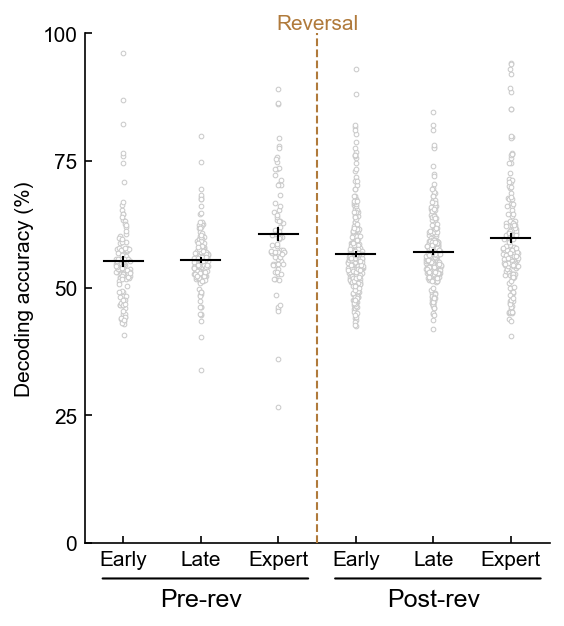

In [10]:
#Firing rate modulation graphs

size=5

#FRmod_baseline_median = np.nanmedian(np.abs(FRmod_preearly))
#print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=GOOD_GREY, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):    
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    mean = np.mean(column)
    SEM = sem(column)
    Q1 = mean-SEM
    Q3 = mean+SEM
    
#     ax.scatter([idx], [mean], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
#     ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
    width=0.25
    ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
    ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)

ax.set_ylim([0,1])
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_yticklabels(['0','25','50','75','100'])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')


#NORMAL
xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, -0.13304656298982956/1.5, 'Pre-rev', ha='center', va='top', fontsize=12)
ax.text(xtick_pos_post, -0.13304656298982956/1.5, 'Post-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Stimulus decoding mean performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

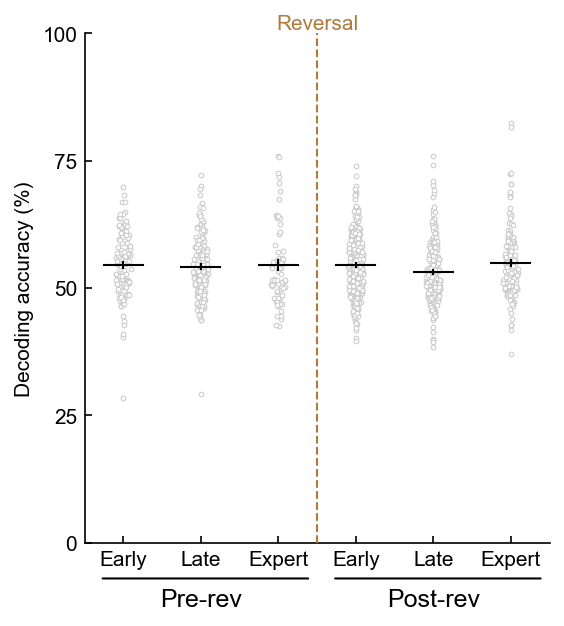

In [22]:
#Firing rate modulation graphs

size=5

#FRmod_baseline_median = np.nanmedian(np.abs(FRmod_preearly))
#print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [Choice_Dec_preearly,Choice_Dec_prelate,Choice_Dec_preexpert,Choice_Dec_postearly,Choice_Dec_postlate,Choice_Dec_postexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=GOOD_GREY, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):    
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    mean = np.mean(column)
    SEM = sem(column)
    Q1 = mean-SEM
    Q3 = mean+SEM
    
#     ax.scatter([idx], [mean], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
#     ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
    width=0.25
    ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
    ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)

ax.set_ylim([0,1])
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_yticklabels(['0','25','50','75','100'])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')


#NORMAL
xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, -0.13304656298982956/1.5, 'Pre-rev', ha='center', va='top', fontsize=12)
ax.text(xtick_pos_post, -0.13304656298982956/1.5, 'Post-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Choice decoding mean performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

# Controls

In [17]:
# Stim_Shuffled_Dec_preearly = []
# Stim_Shuffled_Dec_prelate = []
# Stim_Shuffled_Dec_preexpert = []
# Stim_Shuffled_Dec_postearly = []
# Stim_Shuffled_Dec_postlate = []
# Stim_Shuffled_Dec_postexpert = []

Stim_Synthetic_Dec_preearly = []
Stim_Synthetic_Dec_prelate = []
Stim_Synthetic_Dec_preexpert = []
Stim_Synthetic_Dec_postearly = []
Stim_Synthetic_Dec_postlate = []
Stim_Synthetic_Dec_postexpert = []

# Choice_Shuffled_Dec_preearly = []
# Choice_Shuffled_Dec_prelate = []
# Choice_Shuffled_Dec_preexpert = []
# Choice_Shuffled_Dec_postearly = []
# Choice_Shuffled_Dec_postlate = []
# Choice_Shuffled_Dec_postexpert = []

Choice_Synthetic_Dec_preearly = []
Choice_Synthetic_Dec_prelate = []
Choice_Synthetic_Dec_preexpert = []
Choice_Synthetic_Dec_postearly = []
Choice_Synthetic_Dec_postlate = []
Choice_Synthetic_Dec_postexpert = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
#     stim_shuffled_acc = getDataPoint(dec_df,session,clust,'stimulus','shuffled_control_accuracy')
    stim_synthetic_acc = getDataPoint(dec_df,session,clust,'stimulus','synthetic_control_accuracy')
#     choice_shuffled_acc = getDataPoint(dec_df,session,clust,'response','shuffled_control_weighted_accuracy')
    choice_synthetic_acc = getDataPoint(dec_df,session,clust,'response','synthetic_control_weighted_accuracy')
#     choice_shuffled_acc = getDataPoint(dec_df,session,clust,'response','shuffled_control_accuracy')
#     choice_synthetic_acc = getDataPoint(dec_df,session,clust,'response','synthetic_control_accuracy')
    
    if EILphases[idx] == 'pre early':
#         Stim_Shuffled_Dec_preearly.append(stim_shuffled_acc)
#         Choice_Shuffled_Dec_preearly.append(choice_shuffled_acc)
        Stim_Synthetic_Dec_preearly.append(stim_synthetic_acc)
        Choice_Synthetic_Dec_preearly.append(choice_synthetic_acc)
    elif EILphases[idx] == 'pre late':
#         Stim_Shuffled_Dec_prelate.append(stim_shuffled_acc)
#         Choice_Shuffled_Dec_prelate.append(choice_shuffled_acc)
        Stim_Synthetic_Dec_prelate.append(stim_synthetic_acc)
        Choice_Synthetic_Dec_prelate.append(choice_synthetic_acc)
    elif EILphases[idx] == 'pre expert':
#         Stim_Shuffled_Dec_preexpert.append(stim_shuffled_acc)
#         Choice_Shuffled_Dec_preexpert.append(choice_shuffled_acc)
        Stim_Synthetic_Dec_preexpert.append(stim_synthetic_acc)
        Choice_Synthetic_Dec_preexpert.append(choice_synthetic_acc)
    elif EILphases[idx] == 'post early':
#         Stim_Shuffled_Dec_postearly.append(stim_shuffled_acc)
#         Choice_Shuffled_Dec_postearly.append(choice_shuffled_acc)
        Stim_Synthetic_Dec_postearly.append(stim_synthetic_acc)
        Choice_Synthetic_Dec_postearly.append(choice_synthetic_acc)
    elif EILphases[idx] == 'post late':
#         Stim_Shuffled_Dec_postlate.append(stim_shuffled_acc)
#         Choice_Shuffled_Dec_postlate.append(choice_shuffled_acc)
        Stim_Synthetic_Dec_postlate.append(stim_synthetic_acc)
        Choice_Synthetic_Dec_postlate.append(choice_synthetic_acc)
    elif EILphases[idx] == 'post expert':
#         Stim_Shuffled_Dec_postexpert.append(stim_shuffled_acc)
#         Choice_Shuffled_Dec_postexpert.append(choice_shuffled_acc)
        Stim_Synthetic_Dec_postexpert.append(stim_synthetic_acc)
        Choice_Synthetic_Dec_postexpert.append(choice_synthetic_acc)
        
# Stim_Shuffled_Dec_preearly = np.array(Stim_Shuffled_Dec_preearly)
# Stim_Shuffled_Dec_prelate = np.array(Stim_Shuffled_Dec_prelate)
# Stim_Shuffled_Dec_preexpert = np.array(Stim_Shuffled_Dec_preexpert)
# Stim_Shuffled_Dec_postearly = np.array(Stim_Shuffled_Dec_postearly)
# Stim_Shuffled_Dec_postlate = np.array(Stim_Shuffled_Dec_postlate)
# Stim_Shuffled_Dec_postexpert = np.array(Stim_Shuffled_Dec_postexpert)

Stim_Synthetic_Dec_preearly = np.array(Stim_Synthetic_Dec_preearly)
Stim_Synthetic_Dec_prelate = np.array(Stim_Synthetic_Dec_prelate)
Stim_Synthetic_Dec_preexpert = np.array(Stim_Synthetic_Dec_preexpert)
Stim_Synthetic_Dec_postearly = np.array(Stim_Synthetic_Dec_postearly)
Stim_Synthetic_Dec_postlate = np.array(Stim_Synthetic_Dec_postlate)
Stim_Synthetic_Dec_postexpert = np.array(Stim_Synthetic_Dec_postexpert)

# Choice_Shuffled_Dec_preearly = np.array(Choice_Shuffled_Dec_preearly)
# Choice_Shuffled_Dec_prelate = np.array(Choice_Shuffled_Dec_prelate)
# Choice_Shuffled_Dec_preexpert = np.array(Choice_Shuffled_Dec_preexpert)
# Choice_Shuffled_Dec_postearly = np.array(Choice_Shuffled_Dec_postearly)
# Choice_Shuffled_Dec_postlate = np.array(Choice_Shuffled_Dec_postlate)
# Choice_Shuffled_Dec_postexpert = np.array(Choice_Shuffled_Dec_postexpert)

Choice_Synthetic_Dec_preearly = np.array(Choice_Synthetic_Dec_preearly)
Choice_Synthetic_Dec_prelate = np.array(Choice_Synthetic_Dec_prelate)
Choice_Synthetic_Dec_preexpert = np.array(Choice_Synthetic_Dec_preexpert)
Choice_Synthetic_Dec_postearly = np.array(Choice_Synthetic_Dec_postearly)
Choice_Synthetic_Dec_postlate = np.array(Choice_Synthetic_Dec_postlate)
Choice_Synthetic_Dec_postexpert = np.array(Choice_Synthetic_Dec_postexpert)

1682it [00:24, 67.98it/s] 


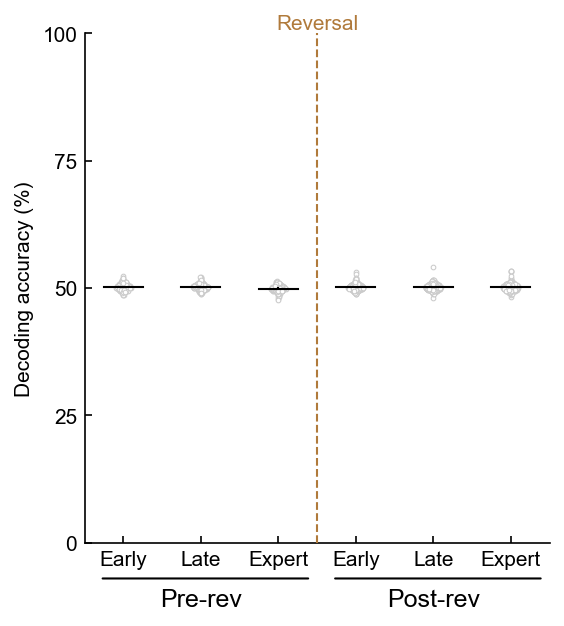

In [36]:
#Firing rate modulation graphs

size=5

#FRmod_baseline_median = np.nanmedian(np.abs(FRmod_preearly))
#print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [Stim_Shuffled_Dec_preearly,Stim_Shuffled_Dec_prelate,Stim_Shuffled_Dec_preexpert,Stim_Shuffled_Dec_postearly,Stim_Shuffled_Dec_postlate,Stim_Shuffled_Dec_postexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=GOOD_GREY, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):    
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    mean = np.mean(column)
    SEM = sem(column)
    Q1 = mean-SEM
    Q3 = mean+SEM
    
#     ax.scatter([idx], [mean], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
#     ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
    width=0.25
    ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
    ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)

ax.set_ylim([0,1])
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_yticklabels(['0','25','50','75','100'])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')


#NORMAL
xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, -0.13304656298982956/1.5, 'Pre-rev', ha='center', va='top', fontsize=12)
ax.text(xtick_pos_post, -0.13304656298982956/1.5, 'Post-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Stimulus shuffled decoding mean performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

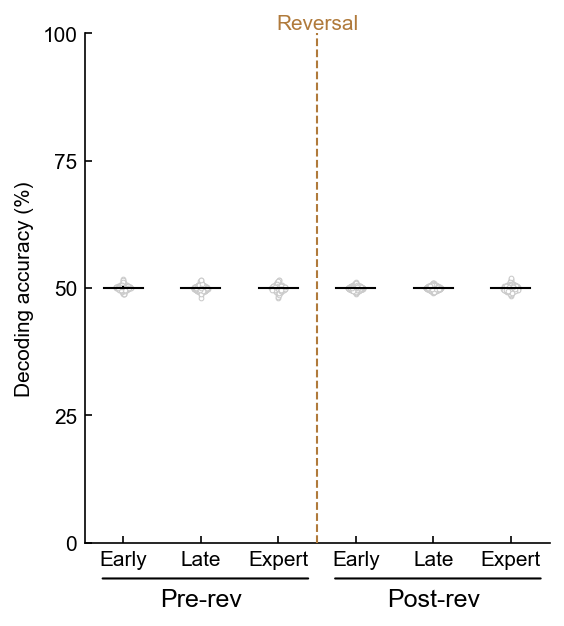

In [12]:
#Firing rate modulation graphs

size=5

#FRmod_baseline_median = np.nanmedian(np.abs(FRmod_preearly))
#print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [Stim_Synthetic_Dec_preearly,Stim_Synthetic_Dec_prelate,Stim_Synthetic_Dec_preexpert,Stim_Synthetic_Dec_postearly,Stim_Synthetic_Dec_postlate,Stim_Synthetic_Dec_postexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=GOOD_GREY, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):    
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    mean = np.mean(column)
    SEM = sem(column)
    Q1 = mean-SEM
    Q3 = mean+SEM
    
#     ax.scatter([idx], [mean], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
#     ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
    width=0.25
    ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
    ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)

ax.set_ylim([0,1])
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_yticklabels(['0','25','50','75','100'])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')


#NORMAL
xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, -0.13304656298982956/1.5, 'Pre-rev', ha='center', va='top', fontsize=12)
ax.text(xtick_pos_post, -0.13304656298982956/1.5, 'Post-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Stimulus synthetic decoding mean performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

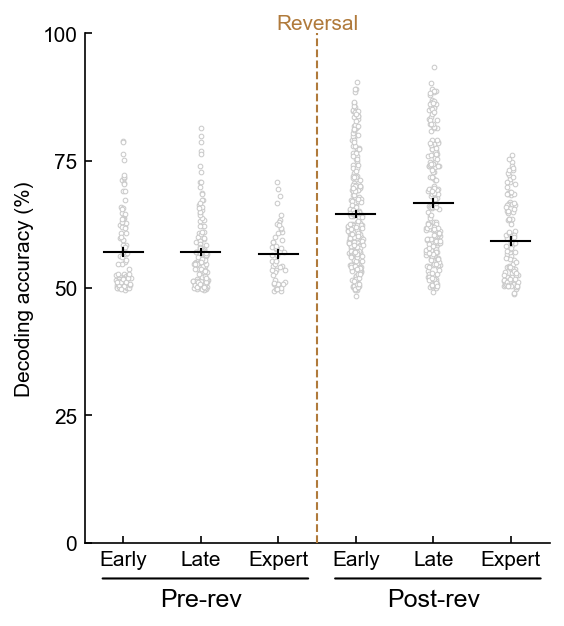

In [38]:
#Firing rate modulation graphs

size=5

#FRmod_baseline_median = np.nanmedian(np.abs(FRmod_preearly))
#print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [Choice_Shuffled_Dec_preearly,Choice_Shuffled_Dec_prelate,Choice_Shuffled_Dec_preexpert,Choice_Shuffled_Dec_postearly,Choice_Shuffled_Dec_postlate,Choice_Shuffled_Dec_postexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=GOOD_GREY, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):    
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    mean = np.mean(column)
    SEM = sem(column)
    Q1 = mean-SEM
    Q3 = mean+SEM
    
#     ax.scatter([idx], [mean], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
#     ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
    width=0.25
    ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
    ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)

ax.set_ylim([0,1])
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_yticklabels(['0','25','50','75','100'])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')


#NORMAL
xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, -0.13304656298982956/1.5, 'Pre-rev', ha='center', va='top', fontsize=12)
ax.text(xtick_pos_post, -0.13304656298982956/1.5, 'Post-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Choice shuffled decoding mean performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

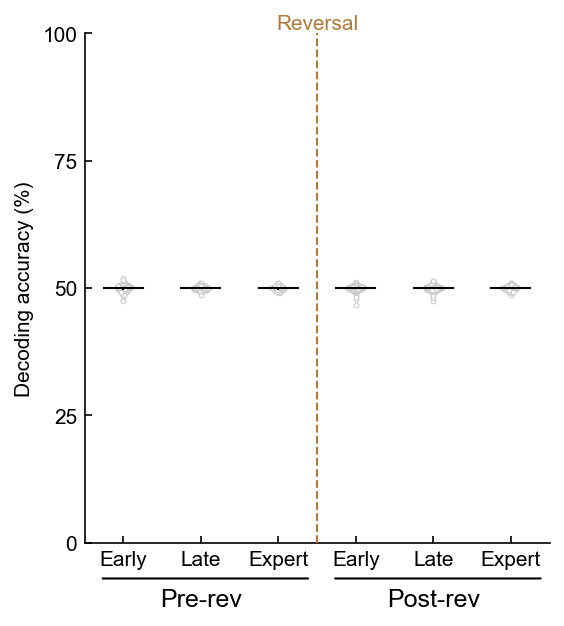

In [18]:
#Firing rate modulation graphs

size=5

#FRmod_baseline_median = np.nanmedian(np.abs(FRmod_preearly))
#print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [Choice_Synthetic_Dec_preearly,Choice_Synthetic_Dec_prelate,Choice_Synthetic_Dec_preexpert,Choice_Synthetic_Dec_postearly,Choice_Synthetic_Dec_postlate,Choice_Synthetic_Dec_postexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=GOOD_GREY, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):    
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    mean = np.mean(column)
    SEM = sem(column)
    Q1 = mean-SEM
    Q3 = mean+SEM
    
#     ax.scatter([idx], [mean], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
#     ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
    width=0.25
    ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
    ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)

ax.set_ylim([0,1])
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_yticklabels(['0','25','50','75','100'])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')


#NORMAL
xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, -0.13304656298982956/1.5, 'Pre-rev', ha='center', va='top', fontsize=12)
ax.text(xtick_pos_post, -0.13304656298982956/1.5, 'Post-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Choice synthetic decoding mean performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [21]:
Stim_Dec_preearly

array([0.5614236 , 0.52262944, 0.57750307,        nan,        nan,
       0.49227604, 0.48350023, 0.53297956, 0.46722786, 0.53154731,
       0.53623601, 0.57218789,        nan,        nan,        nan,
              nan, 0.46606628, 0.54549885,        nan, 0.48337405,
              nan, 0.52708833, 0.47721106,        nan,        nan,
       0.52661849, 0.53680314, 0.49464491, 0.53096449, 0.5471673 ,
              nan, 0.52194604,        nan, 0.47732162,        nan,
       0.55716173, 0.53761743,        nan, 0.45984033, 0.54850904,
              nan,        nan,        nan, 0.57466562,        nan,
       0.46637337,        nan,        nan, 0.56233641, 0.53678821,
              nan, 0.43525194, 0.51927166, 0.61870748, 0.60272383,
       0.6530691 , 0.55039843, 0.47115038, 0.53831014, 0.4830843 ,
       0.54477235, 0.57669989, 0.52912702, 0.51976464, 0.63291395,
       0.51951145, 0.57185665, 0.52130684,        nan,        nan,
       0.4330023 , 0.53052728,        nan,        nan, 0.44351

# Boxplots

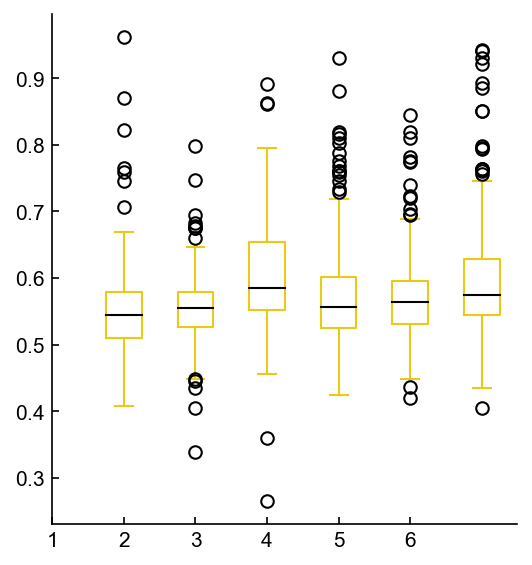

In [51]:
fig, ax = plt.subplots(figsize=(4,4.5))

stim_data = [Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
stim_data = [ilep.rmnan(d) for d in stim_data]

boxprops = dict(linestyle='-', linewidth=1, color=STIM_COLOR)
whiskerprops = dict(linestyle='-', linewidth=1, color=STIM_COLOR)
capprops = dict(linestyle='-', linewidth=1, color=STIM_COLOR)
medianprops = dict(linestyle='-', linewidth=1, color='k')
figdata = ax.boxplot(stim_data,boxprops=boxprops,medianprops=medianprops,whiskerprops=whiskerprops,capprops=capprops)

ax.set_xticks(range(6))

# Stacked decoding plot

<ipython-input-97-bd5170bed882>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  stim_dec = np.array([Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert])*100
<ipython-input-97-bd5170bed882>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  stim_dec_control = np.array([Control_Stim_Dec_preearly,Control_Stim_Dec_prelate,Control_Stim_Dec_preexpert,Control_Stim_Dec_postearly,Control_Stim_Dec_postlate,Control_Stim_Dec_postexpert])*100
<ipython-input-97-bd5170bed882>:13: VisibleDeprecationWarning

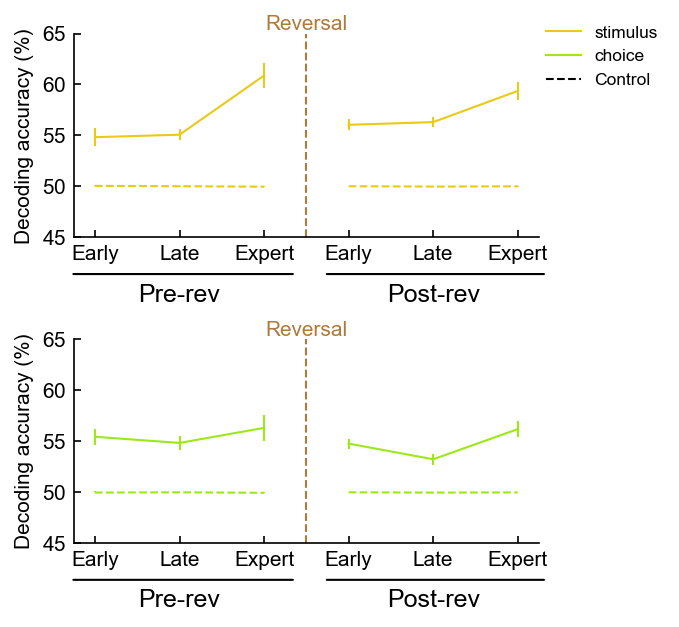

In [97]:
fig = plt.figure(figsize=(4,4.5))
gs = fig.add_gridspec(2,1,wspace=0.25,hspace=0.5)
axs = [plt.subplot(gs[i,j]) for i,j in product(range(2),range(1))]
labels = ['Early','Late','Expert','Early','Late','Expert']

#choice_dec = [Choice_Dec_preearly,Choice_Dec_prelate,Choice_Dec_preexpert,Choice_Dec_postearly,Choice_Dec_postlate,Choice_Dec_postexpert]

stim_dec = np.array([Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert])*100
stim_dec = [ilep.rmnan(d) for d in stim_dec]
stim_dec_control = np.array([Control_Stim_Dec_preearly,Control_Stim_Dec_prelate,Control_Stim_Dec_preexpert,Control_Stim_Dec_postearly,Control_Stim_Dec_postlate,Control_Stim_Dec_postexpert])*100
stim_dec_control = [ilep.rmnan(d) for d in stim_dec_control]

choice_dec = np.array([Choice_Dec_preearly,Choice_Dec_prelate,Choice_Dec_preexpert,Choice_Dec_postearly,Choice_Dec_postlate,Choice_Dec_postexpert])*100
choice_dec = [ilep.rmnan(d) for d in choice_dec]
choice_dec_control = np.array([Control_Choice_Dec_preearly,Control_Choice_Dec_prelate,Control_Choice_Dec_preexpert,Control_Choice_Dec_postearly,Control_Choice_Dec_postlate,Control_Choice_Dec_postexpert])*100
choice_dec_control = [ilep.rmnan(d) for d in choice_dec_control]

# axs[0].plot(range(6),stim_dec)
# axs[0].errorbar(range(6),stim_dec,yerr=stim_dec_sem,elinewidth=10,lw=0)

for idx,column in enumerate(stim_dec):
    mean = np.mean(column)
    SEM = sem(column)
    Q1 = mean-SEM
    Q3 = mean+SEM
#     print(f"{Q1},{mean},{Q3}")
    axs[0].plot([idx]*2,[mean-SEM,mean+SEM],color=STIM_COLOR,lw=1)
axs[0].plot([0,1,2],[np.nanmean(d) for d in stim_dec[0:3]],color=STIM_COLOR,lw=1)
axs[0].plot([3,4,5],[np.nanmean(d) for d in stim_dec[3:6]],color=STIM_COLOR,lw=1)
for idx,column in enumerate(stim_dec_control):
    mean = np.mean(column)
    SEM = sem(column)
    Q1 = mean-SEM
    Q3 = mean+SEM
#     print(f"{Q1},{mean},{Q3}")
    axs[0].plot([idx]*2,[mean-SEM,mean+SEM],color=STIM_COLOR,linestyle='--',lw=1)
axs[0].plot([0,1,2],[np.nanmean(d) for d in stim_dec_control[0:3]],color=STIM_COLOR,linestyle='--',lw=1)
axs[0].plot([3,4,5],[np.nanmean(d) for d in stim_dec_control[3:6]],color=STIM_COLOR,linestyle='--',lw=1)



for idx,column in enumerate(choice_dec):
    mean = np.mean(column)
    SEM = sem(column)
    Q1 = mean-SEM
    Q3 = mean+SEM
#     print(f"{Q1},{mean},{Q3}")
    axs[1].plot([idx]*2,[mean-SEM,mean+SEM],color=CHOICE_COLOR,lw=1)
axs[1].plot([0,1,2],[np.nanmean(d) for d in choice_dec[0:3]],color=CHOICE_COLOR,lw=1)
axs[1].plot([3,4,5],[np.nanmean(d) for d in choice_dec[3:6]],color=CHOICE_COLOR,lw=1)
for idx,column in enumerate(stim_dec_control):
    mean = np.mean(column)
    SEM = sem(column)
    Q1 = mean-SEM
    Q3 = mean+SEM
#     print(f"{Q1},{mean},{Q3}")
    axs[1].plot([idx]*2,[mean-SEM,mean+SEM],color=CHOICE_COLOR,linestyle='--',lw=1)
axs[1].plot([0,1,2],[np.nanmean(d) for d in choice_dec_control[0:3]],color=CHOICE_COLOR,linestyle='--',lw=1)
axs[1].plot([3,4,5],[np.nanmean(d) for d in choice_dec_control[3:6]],color=CHOICE_COLOR,linestyle='--',lw=1)


for ax in axs:
    ax.set_ylim([45,65])
    ax.set_ylabel('Decoding accuracy (%)')
    
    ax.set_xticks(range(6))
    ax.set_xticklabels(labels)
    
    ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=-10,lw=1)
    ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')
    
    xtick_pos_pre = ax.get_xticks()[1]
    xtick_pos_post = ax.get_xticks()[4]
    Yval = ilep.getPrePostLabelYval(ax.get_ylim())-2
    t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
    t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
    ax.annotate('', xy=(-0.01, -0.18), xycoords='axes fraction', xytext=(0.48, -0.18),arrowprops=dict(arrowstyle='-', color='black'))
    ax.annotate('', xy=(0.535, -0.18), xycoords='axes fraction', xytext=(1.02, -0.18),arrowprops=dict(arrowstyle='-', color='black'))

axs[0].plot([],[],color=STIM_COLOR,lw=1,label='stimulus')
axs[0].plot([],[],color=CHOICE_COLOR,lw=1,label='choice')
axs[0].plot([],[],color='k',linestyle='--',lw=1,label='Control')
lgd = axs[0].legend(frameon=False,loc=(1,0.7))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

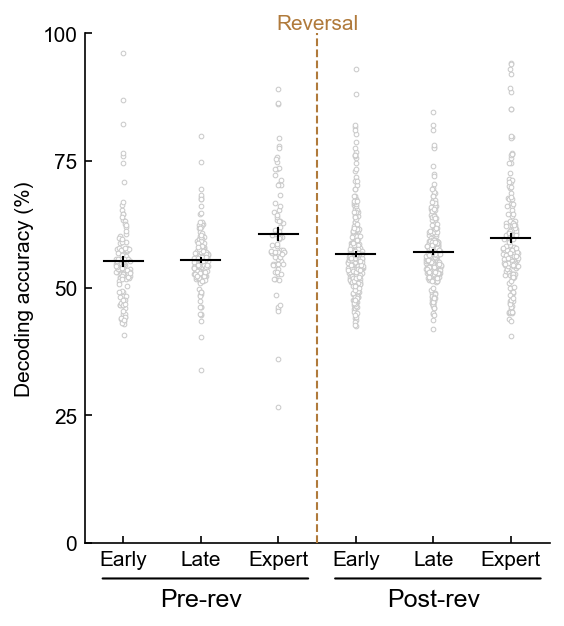

In [10]:
#Firing rate modulation graphs

size=5

#FRmod_baseline_median = np.nanmedian(np.abs(FRmod_preearly))
#print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=GOOD_GREY, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):    
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    mean = np.mean(column)
    SEM = sem(column)
    Q1 = mean-SEM
    Q3 = mean+SEM
    
#     ax.scatter([idx], [mean], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
#     ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
    width=0.25
    ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
    ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)

ax.set_ylim([0,1])
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_yticklabels(['0','25','50','75','100'])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')


#NORMAL
xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, -0.13304656298982956/1.5, 'Pre-rev', ha='center', va='top', fontsize=12)
ax.text(xtick_pos_post, -0.13304656298982956/1.5, 'Post-rev', ha='center', va='top',  fontsize=12)
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Stimulus decoding mean performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

# Paired Stim / Choice Decoding

In [100]:
Stim_acc_list = [Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
Choice_acc_list = [Choice_Dec_preearly,Choice_Dec_prelate,Choice_Dec_preexpert,Choice_Dec_postearly,Choice_Dec_postlate,Choice_Dec_postexpert]
Control_Stim_acc_list = [Control_Stim_Dec_preearly,Control_Stim_Dec_prelate,Control_Stim_Dec_preexpert,Control_Stim_Dec_postearly,Control_Stim_Dec_postlate,Control_Stim_Dec_postexpert]
Control_Choice_acc_list = [Control_Choice_Dec_preearly,Control_Choice_Dec_prelate,Control_Choice_Dec_preexpert,Control_Choice_Dec_postearly,Control_Choice_Dec_postlate,Control_Choice_Dec_postexpert]

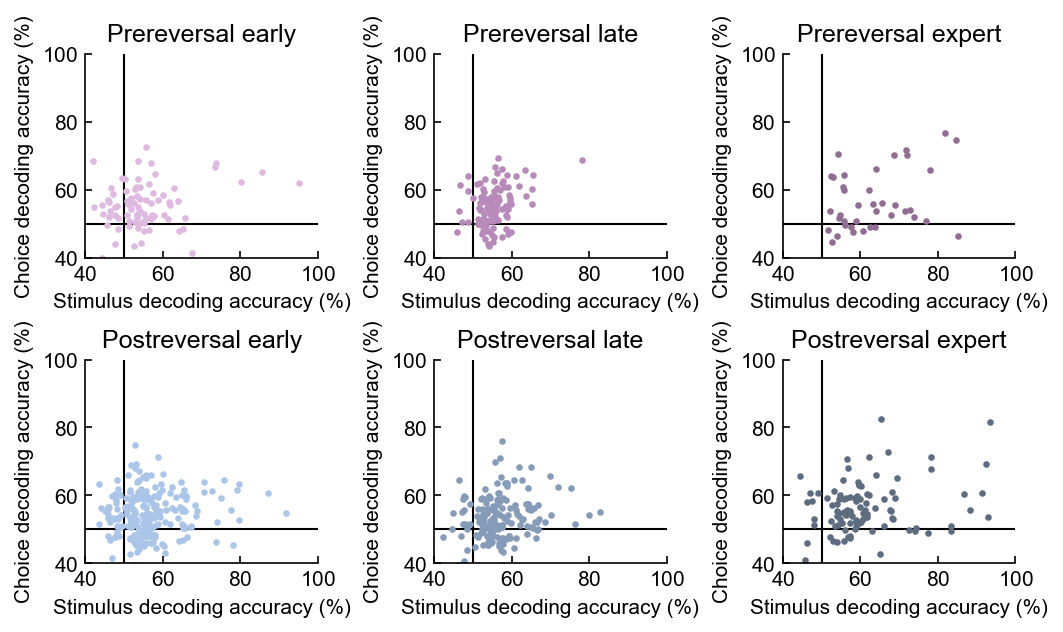

In [135]:
fig = plt.figure(figsize=(8,4.5))
gs = fig.add_gridspec(2,3,wspace=0.5,hspace=0.5)
axs = [plt.subplot(gs[i,j]) for i,j in product(range(2),range(3))]
labels = ['Prereversal early','Prereversal late','Prereversal expert','Postreversal early','Postreversal late','Postreversal expert']

for idx,(stim,choice,ax,label) in enumerate(zip(Stim_acc_list,Choice_acc_list,axs,labels)):
    ax.scatter(stim*100,choice*100,s=10,lw=0,c=PHASE_COLORS[idx])
    ax.axvline(50,linestyle='-',lw=1,c='k',zorder=-10)
    ax.axhline(50,linestyle='-',lw=1,c='k',zorder=-10)
    
    ax.set_xlim([40,100])
    ax.set_xlabel('Stimulus decoding accuracy (%)')
    
    ax.set_ylim([40,100])
    ax.set_ylabel('Choice decoding accuracy (%)')
    
    ax.set_title(label)
    
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Paired stim choice decoding accuracy V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

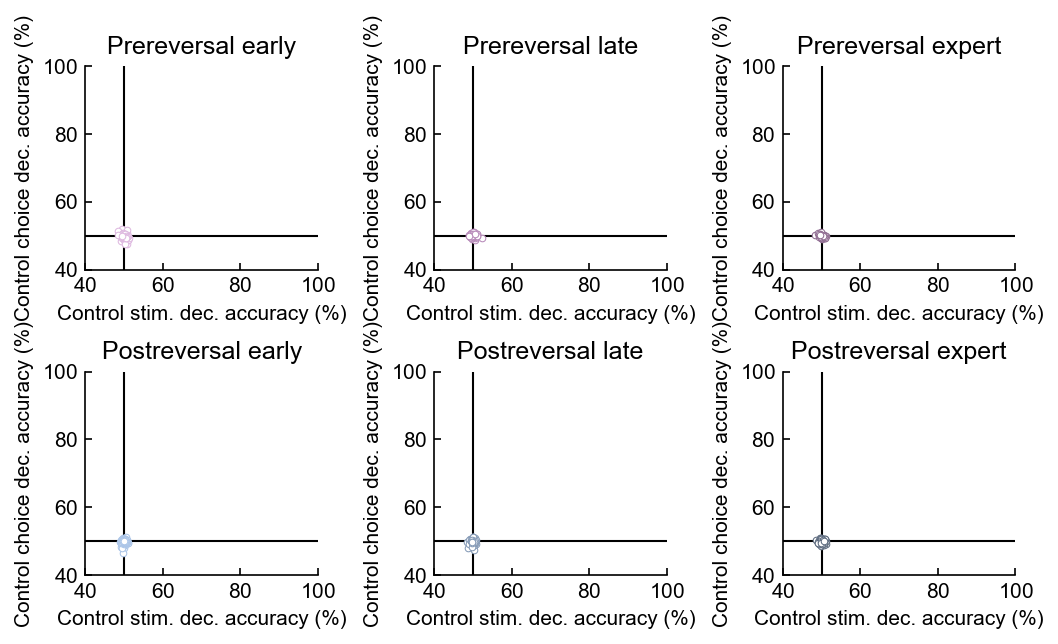

In [136]:
fig = plt.figure(figsize=(8,4.5))
gs = fig.add_gridspec(2,3,wspace=0.5,hspace=0.5)
axs = [plt.subplot(gs[i,j]) for i,j in product(range(2),range(3))]
labels = ['Prereversal early','Prereversal late','Prereversal expert','Postreversal early','Postreversal late','Postreversal expert']

for idx,(stim,choice,ax,label) in enumerate(zip(Control_Stim_acc_list,Control_Choice_acc_list,axs,labels)):
    ax.scatter(stim*100,choice*100,s=10,fc='white',ec=PHASE_COLORS[idx],lw=0.5)
    ax.axvline(50,linestyle='-',lw=1,c='k',zorder=-10)
    ax.axhline(50,linestyle='-',lw=1,c='k',zorder=-10)
    
    ax.set_xlim([40,100])
    ax.set_xlabel('Control stim. dec. accuracy (%)')
    
    ax.set_ylim([40,100])
    ax.set_ylabel('Control choice dec. accuracy (%)')
    
    ax.set_title(label)
    
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Paired stim choice control decoding accuracy V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

# Decoding over learning separated by CR / NCR

In [142]:
CR_Stim_Dec_preearly = []
CR_Stim_Dec_prelate = []
CR_Stim_Dec_preexpert = []
CR_Stim_Dec_postearly = []
CR_Stim_Dec_postlate = []
CR_Stim_Dec_postexpert = []

NCR_Stim_Dec_preearly = []
NCR_Stim_Dec_prelate = []
NCR_Stim_Dec_preexpert = []
NCR_Stim_Dec_postearly = []
NCR_Stim_Dec_postlate = []
NCR_Stim_Dec_postexpert = []

CR_Choice_Dec_preearly = []
CR_Choice_Dec_prelate = []
CR_Choice_Dec_preexpert = []
CR_Choice_Dec_postearly = []
CR_Choice_Dec_postlate = []
CR_Choice_Dec_postexpert = []

NCR_Choice_Dec_preearly = []
NCR_Choice_Dec_prelate = []
NCR_Choice_Dec_preexpert = []
NCR_Choice_Dec_postearly = []
NCR_Choice_Dec_postlate = []
NCR_Choice_Dec_postexpert = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    
    stim_acc = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    choice_acc = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    stim_acc_control = getDataPoint(dec_df,session,clust,'stimulus','synthetic_control_weighted_accuracy')
    choice_acc_control = getDataPoint(dec_df,session,clust,'response','synthetic_control_weighted_accuracy')
    
    if getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control') > 0.05:
        stim_acc = np.nan
    if getDataPoint(dec_df,session,clust,'response','pval_synthetic_control') > 0.05:
        choice_acc = np.nan
        
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    if EILphases[idx] == 'pre early':
        if FRmod >= 3.5:
            CR_Stim_Dec_preearly.append(stim_acc)
            CR_Choice_Dec_preearly.append(choice_acc)
        else:
            NCR_Stim_Dec_preearly.append(stim_acc)
            NCR_Choice_Dec_preearly.append(choice_acc)
    elif EILphases[idx] == 'pre late':
        if FRmod >= 3.5:
            CR_Stim_Dec_prelate.append(stim_acc)
            CR_Choice_Dec_prelate.append(choice_acc)
        else:
            NCR_Stim_Dec_prelate.append(stim_acc)
            NCR_Choice_Dec_prelate.append(choice_acc)
    elif EILphases[idx] == 'pre expert':
        if FRmod >= 3.5:
            CR_Stim_Dec_preexpert.append(stim_acc)
            CR_Choice_Dec_preexpert.append(choice_acc)
        else:
            NCR_Stim_Dec_preexpert.append(stim_acc)
            NCR_Choice_Dec_preexpert.append(choice_acc)
    elif EILphases[idx] == 'post early':
        if FRmod >= 3.5:
            CR_Stim_Dec_postearly.append(stim_acc)
            CR_Choice_Dec_postearly.append(choice_acc)
        else:
            NCR_Stim_Dec_postearly.append(stim_acc)
            NCR_Choice_Dec_postearly.append(choice_acc)
    elif EILphases[idx] == 'post late':
        if FRmod >= 3.5:
            CR_Stim_Dec_postlate.append(stim_acc)
            CR_Choice_Dec_postlate.append(choice_acc)
        else:
            NCR_Stim_Dec_postlate.append(stim_acc)
            NCR_Choice_Dec_postlate.append(choice_acc)
    elif EILphases[idx] == 'post expert':
        if FRmod >= 3.5:
            CR_Stim_Dec_postexpert.append(stim_acc)
            CR_Choice_Dec_postexpert.append(choice_acc)
        else:
            NCR_Stim_Dec_postexpert.append(stim_acc)
            NCR_Choice_Dec_postexpert.append(choice_acc)
        
CR_Stim_Dec_preearly = np.array(CR_Stim_Dec_preearly)
CR_Stim_Dec_prelate = np.array(CR_Stim_Dec_prelate)
CR_Stim_Dec_preexpert = np.array(CR_Stim_Dec_preexpert)
CR_Stim_Dec_postearly = np.array(CR_Stim_Dec_postearly)
CR_Stim_Dec_postlate = np.array(CR_Stim_Dec_postlate)
CR_Stim_Dec_postexpert = np.array(CR_Stim_Dec_postexpert)

NCR_Stim_Dec_preearly = np.array(NCR_Stim_Dec_preearly)
NCR_Stim_Dec_prelate = np.array(NCR_Stim_Dec_prelate)
NCR_Stim_Dec_preexpert = np.array(NCR_Stim_Dec_preexpert)
NCR_Stim_Dec_postearly = np.array(NCR_Stim_Dec_postearly)
NCR_Stim_Dec_postlate = np.array(NCR_Stim_Dec_postlate)
NCR_Stim_Dec_postexpert = np.array(NCR_Stim_Dec_postexpert)

CR_Choice_Dec_preearly = np.array(CR_Choice_Dec_preearly)
CR_Choice_Dec_prelate = np.array(CR_Choice_Dec_prelate)
CR_Choice_Dec_preexpert = np.array(CR_Choice_Dec_preexpert)
CR_Choice_Dec_postearly = np.array(CR_Choice_Dec_postearly)
CR_Choice_Dec_postlate = np.array(CR_Choice_Dec_postlate)
CR_Choice_Dec_postexpert = np.array(CR_Choice_Dec_postexpert)

NCR_Choice_Dec_preearly = np.array(NCR_Choice_Dec_preearly)
NCR_Choice_Dec_prelate = np.array(NCR_Choice_Dec_prelate)
NCR_Choice_Dec_preexpert = np.array(NCR_Choice_Dec_preexpert)
NCR_Choice_Dec_postearly = np.array(NCR_Choice_Dec_postearly)
NCR_Choice_Dec_postlate = np.array(NCR_Choice_Dec_postlate)
NCR_Choice_Dec_postexpert = np.array(NCR_Choice_Dec_postexpert)

1682it [00:32, 52.41it/s] 


In [143]:
CR_Stim_acc_list = [CR_Stim_Dec_preearly,CR_Stim_Dec_prelate,CR_Stim_Dec_preexpert,CR_Stim_Dec_postearly,CR_Stim_Dec_postlate,CR_Stim_Dec_postexpert]
CR_Choice_acc_list = [CR_Choice_Dec_preearly,CR_Choice_Dec_prelate,CR_Choice_Dec_preexpert,CR_Choice_Dec_postearly,CR_Choice_Dec_postlate,CR_Choice_Dec_postexpert]
NCR_Stim_acc_list = [NCR_Stim_Dec_preearly,NCR_Stim_Dec_prelate,NCR_Stim_Dec_preexpert,NCR_Stim_Dec_postearly,NCR_Stim_Dec_postlate,NCR_Stim_Dec_postexpert]
NCR_Choice_acc_list = [NCR_Choice_Dec_preearly,NCR_Choice_Dec_prelate,NCR_Choice_Dec_preexpert,NCR_Choice_Dec_postearly,NCR_Choice_Dec_postlate,NCR_Choice_Dec_postexpert]

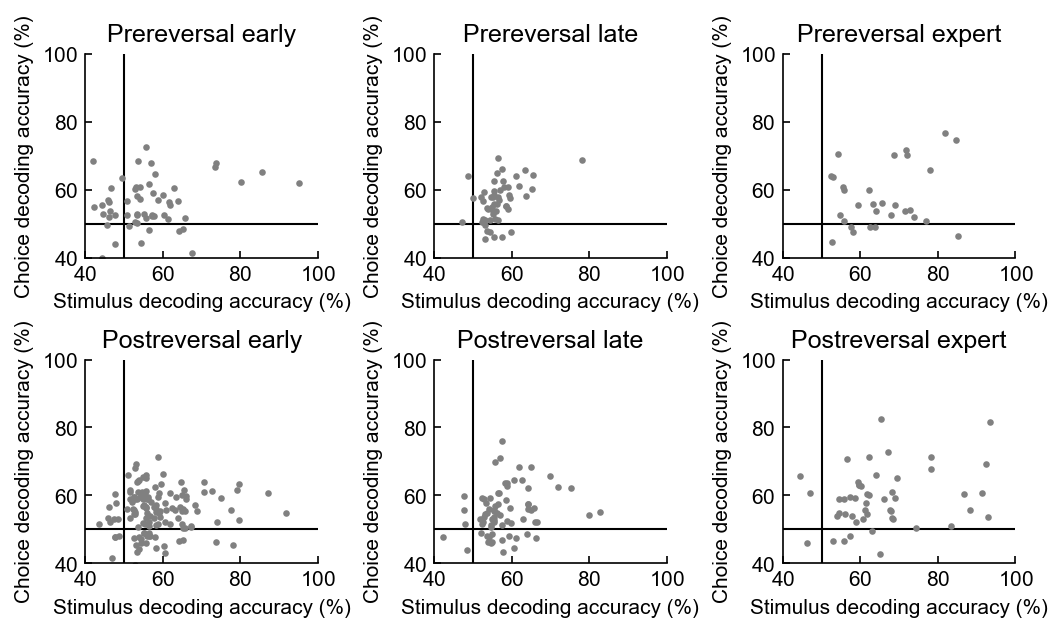

In [147]:
fig = plt.figure(figsize=(8,4.5))
gs = fig.add_gridspec(2,3,wspace=0.5,hspace=0.5)
axs = [plt.subplot(gs[i,j]) for i,j in product(range(2),range(3))]
labels = ['Prereversal early','Prereversal late','Prereversal expert','Postreversal early','Postreversal late','Postreversal expert']

for idx,(stim,choice,ax,label) in enumerate(zip(CR_Stim_acc_list,CR_Choice_acc_list,axs,labels)):
    ax.scatter(stim*100,choice*100,s=10,lw=0,c=CR_COLOR)
    ax.axvline(50,linestyle='-',lw=1,c='k',zorder=-10)
    ax.axhline(50,linestyle='-',lw=1,c='k',zorder=-10)
    
    ax.set_xlim([40,100])
    ax.set_xlabel('Stimulus decoding accuracy (%)')
    
    ax.set_ylim([40,100])
    ax.set_ylabel('Choice decoding accuracy (%)')
    
    ax.set_title(label)
    
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','CR Paired stim choice decoding accuracy V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

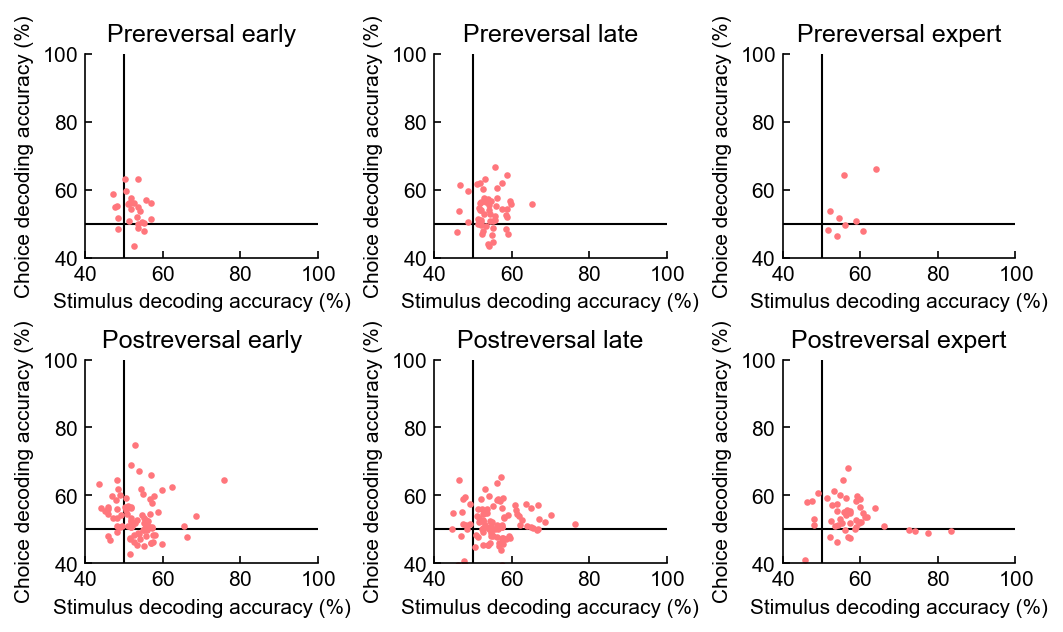

In [148]:
fig = plt.figure(figsize=(8,4.5))
gs = fig.add_gridspec(2,3,wspace=0.5,hspace=0.5)
axs = [plt.subplot(gs[i,j]) for i,j in product(range(2),range(3))]
labels = ['Prereversal early','Prereversal late','Prereversal expert','Postreversal early','Postreversal late','Postreversal expert']

for idx,(stim,choice,ax,label) in enumerate(zip(NCR_Stim_acc_list,NCR_Choice_acc_list,axs,labels)):
    ax.scatter(stim*100,choice*100,s=10,lw=0,c=NCR_COLOR)
    ax.axvline(50,linestyle='-',lw=1,c='k',zorder=-10)
    ax.axhline(50,linestyle='-',lw=1,c='k',zorder=-10)
    
    ax.set_xlim([40,100])
    ax.set_xlabel('Stimulus decoding accuracy (%)')
    
    ax.set_ylim([40,100])
    ax.set_ylabel('Choice decoding accuracy (%)')
    
    ax.set_title(label)
    
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','NCR Paired stim choice decoding accuracy V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

# Passive decoding

In [10]:
animals_in_cache = []

EnumACSession = []
EnumACClust = []

for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.animal not in ['TH_201','TH_203','LA_204','LA_205','TH_200', 'TH_230','AE_229','TH_233','TH_234']:
        continue
    
    animals_in_cache.append(sessionfile.meta.animal)
    
    for clust in sessionfile.clusters.good:
        if sessionfile.meta.region == "AC":
            EnumACSession.append(session)
            EnumACClust.append(clust)
        
animals_in_cache = np.unique(animals_in_cache)

100%|██████████| 723/723 [00:04<00:00, 147.84it/s]


In [11]:
#Define 6 learning phases(days)
pre_early = 4
pre_late = 6
pre_expert = 8
post_early = 12
post_late = 15
post_expert = 16

#
passive_FRmod_preearly = []
passive_FRmod_prelate = []
passive_FRmod_preexpert = []
passive_FRmod_postearly = []
passive_FRmod_postlate = []
passive_FRmod_postexpert = []

#
preexpert_session_num = []
postlate_session_num = []
postexpert_session_num = []


In [12]:
preearly_animal = []
prelate_animal = []
preexpert_animal = []
postearly_animal = []
postlate_animal = []
postexpert_animal = []

pre_early_session = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumACSession,EnumACClust))):
    ACsessionfile = ilep.loadSessionCached(act_directory,session)
    
    #1,2,3,4
    if ACsessionfile.meta.day_of_training <= pre_early:
        passive_FRmod_preearly.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        preearly_animal.append(ACsessionfile.meta.animal)
        pre_early_session.append(session)
#         print(ACsessionfile.meta.files)
#         print(ACsessionfile.meta.directory)
#         print()
        if ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation < 1:
            print(f"{session} clust {clust} is an NCR")
        
    #5,6
    if ACsessionfile.meta.day_of_training <= pre_late and ACsessionfile.meta.day_of_training >pre_early:
        passive_FRmod_prelate.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        prelate_animal.append(ACsessionfile.meta.animal)
    
    #7,8
    if ACsessionfile.meta.day_of_training <= pre_expert and ACsessionfile.meta.day_of_training >pre_late:
        passive_FRmod_preexpert.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        preexpert_session_num.append(ACsessionfile.meta.files)
        preexpert_animal.append(ACsessionfile.meta.animal)
        
    #9,10,11,12
    if ACsessionfile.meta.day_of_training <= post_early and ACsessionfile.meta.day_of_training >pre_expert:
        passive_FRmod_postearly.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        postearly_animal.append(ACsessionfile.meta.animal)

    #13,14,15
    if ACsessionfile.meta.day_of_training <= post_late and ACsessionfile.meta.day_of_training >post_early:
        passive_FRmod_postlate.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        postlate_session_num.append(ACsessionfile.meta.files)
        postlate_animal.append(ACsessionfile.meta.animal)
    
    #16,17,18,19,20,21
    if ACsessionfile.meta.day_of_training >= post_expert:
        passive_FRmod_postexpert.append(ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        postexpert_session_num.append(ACsessionfile.meta.files)
        postexpert_animal.append(ACsessionfile.meta.animal)
    

651it [00:03, 267.67it/s]

TH_201_1_passive_AC.pickle clust 89 is an NCR
TH_201_1_passive_AC.pickle clust 201 is an NCR


680it [00:04, 220.34it/s]

TH_201_2_passive_AC.pickle clust 74 is an NCR
TH_201_2_passive_AC.pickle clust 167 is an NCR
TH_201_2_passive_AC.pickle clust 204 is an NCR


726it [00:04, 170.80it/s]

TH_201_2_passive_AC.pickle clust 231 is an NCR
TH_201_3_passive_AC.pickle clust 72 is an NCR
TH_201_3_passive_AC.pickle clust 76 is an NCR
TH_201_3_passive_AC.pickle clust 127 is an NCR


763it [00:04, 156.35it/s]

TH_201_3_passive_AC.pickle clust 154 is an NCR
TH_201_3_passive_AC.pickle clust 169 is an NCR
TH_201_3_passive_AC.pickle clust 229 is an NCR
TH_201_3_passive_AC.pickle clust 230 is an NCR


805it [00:04, 178.63it/s]

TH_201_4_passive_AC.pickle clust 70 is an NCR
TH_201_4_passive_AC.pickle clust 79 is an NCR
TH_201_4_passive_AC.pickle clust 224 is an NCR


848it [00:05, 171.24it/s]

TH_203_1_passive_AC.pickle clust 121 is an NCR
TH_203_1_passive_AC.pickle clust 191 is an NCR
TH_203_1_passive_AC.pickle clust 228 is an NCR
TH_203_1_passive_AC.pickle clust 278 is an NCR
TH_203_1_passive_AC.pickle clust 296 is an NCR
TH_203_1_passive_AC.pickle clust 336 is an NCR
TH_203_1_passive_AC.pickle clust 348 is an NCR
TH_203_1_passive_AC.pickle clust 357 is an NCR
TH_203_1_passive_AC.pickle clust 376 is an NCR
TH_203_2_passive_AC.pickle clust 24 is an NCR
TH_203_2_passive_AC.pickle clust 75 is an NCR
TH_203_2_passive_AC.pickle clust 80 is an NCR


911it [00:05, 194.75it/s]

TH_203_2_passive_AC.pickle clust 240 is an NCR
TH_203_2_passive_AC.pickle clust 253 is an NCR
TH_203_3_passive_AC.pickle clust 27 is an NCR
TH_203_4_passive_AC.pickle clust 38 is an NCR
TH_203_4_passive_AC.pickle clust 46 is an NCR
TH_203_4_passive_AC.pickle clust 87 is an NCR
TH_203_4_passive_AC.pickle clust 88 is an NCR
TH_203_4_passive_AC.pickle clust 121 is an NCR
TH_203_4_passive_AC.pickle clust 122 is an NCR
TH_203_4_passive_AC.pickle clust 133 is an NCR
TH_203_4_passive_AC.pickle clust 134 is an NCR
TH_203_4_passive_AC.pickle clust 138 is an NCR
TH_203_4_passive_AC.pickle clust 148 is an NCR
TH_203_4_passive_AC.pickle clust 156 is an NCR


1442it [00:08, 174.05it/s]


In [13]:
passive_FRmod_preearly = np.array(passive_FRmod_preearly)
passive_FRmod_prelate = np.array(passive_FRmod_prelate)
passive_FRmod_preexpert = np.array(passive_FRmod_preexpert)
passive_FRmod_postearly = np.array(passive_FRmod_postearly)
passive_FRmod_postlate = np.array(passive_FRmod_postlate)
passive_FRmod_postexpert = np.array(passive_FRmod_postexpert)

In [14]:
passive_Stim_Dec_preearly = []
passive_Stim_Dec_prelate = []
passive_Stim_Dec_preexpert = []
passive_Stim_Dec_postearly = []
passive_Stim_Dec_postlate = []
passive_Stim_Dec_postexpert = []

passive_Choice_Dec_preearly = []
passive_Choice_Dec_prelate = []
passive_Choice_Dec_preexpert = []
passive_Choice_Dec_postearly = []
passive_Choice_Dec_postlate = []
passive_Choice_Dec_postexpert = []

passive_Control_Stim_Dec_preearly = []
passive_Control_Stim_Dec_prelate = []
passive_Control_Stim_Dec_preexpert = []
passive_Control_Stim_Dec_postearly = []
passive_Control_Stim_Dec_postlate = []
passive_Control_Stim_Dec_postexpert = []

passive_Control_Choice_Dec_preearly = []
passive_Control_Choice_Dec_prelate = []
passive_Control_Choice_Dec_preexpert = []
passive_Control_Choice_Dec_postearly = []
passive_Control_Choice_Dec_postlate = []
passive_Control_Choice_Dec_postexpert = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumACSession,EnumACClust))):
    ACsessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        FRmod = ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation
    except Exception as e:
        print(e)
        FRmod = np.nan
    
    stim_acc = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    choice_acc = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    stim_acc_control = getDataPoint(dec_df,session,clust,'stimulus','synthetic_control_weighted_accuracy')
    choice_acc_control = getDataPoint(dec_df,session,clust,'response','synthetic_control_weighted_accuracy')
    
    if getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control') > 0.05:
        stim_acc = np.nan
    if getDataPoint(dec_df,session,clust,'response','pval_synthetic_control') > 0.05:
        choice_acc = np.nan
        
    if EILphases[idx] not in ['pre expert','post expert'] and ACsessionfile.meta.animal in ['DS_15','DS_19']:
        continue

    #1,2,3,4
    if ACsessionfile.meta.day_of_training <= pre_early:
        passive_Stim_Dec_preearly.append(stim_acc)
        passive_Choice_Dec_preearly.append(choice_acc)
        passive_Control_Stim_Dec_preearly.append(stim_acc_control)
        passive_Control_Choice_Dec_preearly.append(choice_acc_control)
        
    #5,6
    if ACsessionfile.meta.day_of_training <= pre_late and ACsessionfile.meta.day_of_training >pre_early:
        passive_Stim_Dec_prelate.append(stim_acc)
        passive_Choice_Dec_prelate.append(choice_acc)
        passive_Control_Stim_Dec_prelate.append(stim_acc_control)
        passive_Control_Choice_Dec_prelate.append(choice_acc_control)
    
    #7,8
    if ACsessionfile.meta.day_of_training <= pre_expert and ACsessionfile.meta.day_of_training >pre_late:
        passive_Stim_Dec_preexpert.append(stim_acc)
        passive_Choice_Dec_preexpert.append(choice_acc)
        passive_Control_Stim_Dec_preexpert.append(stim_acc_control)
        passive_Control_Choice_Dec_preexpert.append(choice_acc_control)
        
    #9,10,11,12
    if ACsessionfile.meta.day_of_training <= post_early and ACsessionfile.meta.day_of_training >pre_expert:
        passive_Stim_Dec_postearly.append(stim_acc)
        passive_Choice_Dec_postearly.append(choice_acc)
        passive_Control_Stim_Dec_postearly.append(stim_acc_control)
        passive_Control_Choice_Dec_postearly.append(choice_acc_control)

    #13,14,15
    if ACsessionfile.meta.day_of_training <= post_late and ACsessionfile.meta.day_of_training >post_early:
        passive_Stim_Dec_postlate.append(stim_acc)
        passive_Choice_Dec_postlate.append(choice_acc)
        passive_Control_Stim_Dec_postlate.append(stim_acc_control)
        passive_Control_Choice_Dec_postlate.append(choice_acc_control)
    
    #16,17,18,19,20,21
    if ACsessionfile.meta.day_of_training >= post_expert:
        passive_Stim_Dec_postexpert.append(stim_acc)
        passive_Choice_Dec_postexpert.append(choice_acc)
        passive_Control_Stim_Dec_postexpert.append(stim_acc_control)
        passive_Control_Choice_Dec_postexpert.append(choice_acc_control)
        
passive_Stim_Dec_preearly = np.array(passive_Stim_Dec_preearly)
passive_Stim_Dec_prelate = np.array(passive_Stim_Dec_prelate)
passive_Stim_Dec_preexpert = np.array(passive_Stim_Dec_preexpert)
passive_Stim_Dec_postearly = np.array(passive_Stim_Dec_postearly)
passive_Stim_Dec_postlate = np.array(passive_Stim_Dec_postlate)
passive_Stim_Dec_postexpert = np.array(passive_Stim_Dec_postexpert)

passive_Choice_Dec_preearly = np.array(passive_Choice_Dec_preearly)
passive_Choice_Dec_prelate = np.array(passive_Choice_Dec_prelate)
passive_Choice_Dec_preexpert = np.array(passive_Choice_Dec_preexpert)
passive_Choice_Dec_postearly = np.array(passive_Choice_Dec_postearly)
passive_Choice_Dec_postlate = np.array(passive_Choice_Dec_postlate)
passive_Choice_Dec_postexpert = np.array(passive_Choice_Dec_postexpert)

passive_Control_Stim_Dec_preearly = np.array(passive_Control_Stim_Dec_preearly)
passive_Control_Stim_Dec_prelate = np.array(passive_Control_Stim_Dec_prelate)
passive_Control_Stim_Dec_preexpert = np.array(passive_Control_Stim_Dec_preexpert)
passive_Control_Stim_Dec_postearly = np.array(passive_Control_Stim_Dec_postearly)
passive_Control_Stim_Dec_postlate = np.array(passive_Control_Stim_Dec_postlate)
passive_Control_Stim_Dec_postexpert = np.array(passive_Control_Stim_Dec_postexpert)

passive_Control_Choice_Dec_preearly = np.array(passive_Control_Choice_Dec_preearly)
passive_Control_Choice_Dec_prelate = np.array(passive_Control_Choice_Dec_prelate)
passive_Control_Choice_Dec_preexpert = np.array(passive_Control_Choice_Dec_preexpert)
passive_Control_Choice_Dec_postearly = np.array(passive_Control_Choice_Dec_postearly)
passive_Control_Choice_Dec_postlate = np.array(passive_Control_Choice_Dec_postlate)
passive_Control_Choice_Dec_postexpert = np.array(passive_Control_Choice_Dec_postexpert)

1442it [00:16, 84.96it/s] 


In [15]:
passive_Control_Stim_Dec_overall = np.concatenate([passive_Control_Stim_Dec_preearly,passive_Control_Stim_Dec_prelate,passive_Control_Stim_Dec_preexpert,passive_Control_Stim_Dec_postearly,passive_Control_Stim_Dec_postlate,passive_Control_Stim_Dec_postexpert])
passive_FRmod_Stim_overall = np.concatenate([passive_FRmod_preearly,passive_FRmod_prelate,passive_FRmod_preexpert,passive_FRmod_postearly,passive_FRmod_postlate,passive_FRmod_postexpert])

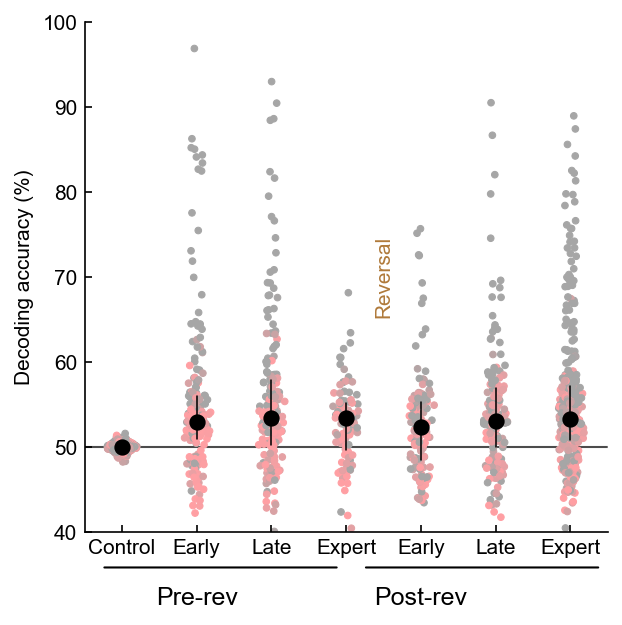

In [25]:
#Firing rate modulation graphs

size=10

#FRmod_baseline_median = np.nanmedian(np.abs(FRmod_preearly))
#print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4.5,4.5))
# fig, ax = plt.subplots(figsize=(5,3))
data = [passive_Control_Stim_Dec_overall,passive_Stim_Dec_preearly,passive_Stim_Dec_prelate,passive_Stim_Dec_preexpert,passive_Stim_Dec_postearly,passive_Stim_Dec_postlate,passive_Stim_Dec_postexpert]
FRmoddata = [passive_FRmod_Stim_overall,passive_FRmod_preearly,passive_FRmod_prelate,passive_FRmod_preexpert,passive_FRmod_postearly,passive_FRmod_postlate,passive_FRmod_postexpert]
#data = [np.abs(column[np.isfinite(column)]) for column in data]
#num_animal = [preearly_animal_num,prelate_animal_num,preexpert_animal_num,postearly_animal_num,postlate_animal_num,postexpert_animal_num]
labels = ['Control','Early','Late','Expert','Early','Late','Expert']
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.4,minjitter=0.075)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.4,minjitter=0.075)
colors = NCR_CR_cmap((np.concatenate(FRmoddata)-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc=colors, lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    eye_color=GOOD_GREY#NCR_CR_cmap((percentCR-40)/20)
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    #border_color=colorsys.hls_to_rgb(h,l*0.5,s)
    border_color=colorsys.hls_to_rgb(h,l,s)
    
    border_color = 'k'
    eye_color = 'k'

    summary_size=50
    summary_width=0.75
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
    ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

ax.axhline(0.5,color='k',linestyle='-',zorder=-20,lw=1)

ax.set_ylim([0.4,1])
ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['40','50','60','70','80','90','100'])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim([-0.5,6.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

    
rev = 3.5
size = 0.3
center = np.mean(ax.get_ylim())
ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
#ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
#ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')

ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.3,zorder=-5)

#NORMAL
xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.01
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Passive decoding performance over phases V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(t1,t2), bbox_inches='tight')

In [17]:
data_dec = SimpleNamespace()
data_dec.preearly = passive_Stim_Dec_preearly
data_dec.prelate = passive_Stim_Dec_prelate
data_dec.preexpert = passive_Stim_Dec_preexpert
data_dec.postearly = passive_Stim_Dec_postearly
data_dec.postlate = passive_Stim_Dec_postlate
data_dec.postexpert = passive_Stim_Dec_postexpert
ilep.nonparametricIndependentStatsCompareToPreearly(data_dec)
pass

            Source         SS      DF        MS         F     p-unc       np2
0            phase   0.053587     4.0  0.013397  1.944400  0.100526  0.003929
1          context   0.013955     1.0  0.013955  2.025404  0.154846  0.001026
2  phase * context   0.061537     4.0  0.015384  2.232852  0.063240  0.004509
3         Residual  13.586994  1972.0  0.006890       NaN       NaN       NaN

          phase         A             B     p-unc    p-corr    hedges
11   post-early  baseline  experimental  0.049087  0.245437  0.267481
12  post-expert  baseline  experimental  0.274228  0.563383 -0.054381
13    post-late  baseline  experimental  0.965869  0.965869  0.065239
14   pre-expert  baseline  experimental  0.439108  0.563383  0.275364
15     pre-late  baseline  experimental  0.450706  0.563383 -0.058290


In [18]:
data_passive = SimpleNamespace()
data_passive.preearly = passive_Stim_Dec_preearly
data_passive.prelate = passive_Stim_Dec_prelate
data_passive.preexpert = passive_Stim_Dec_preexpert
data_passive.postearly = passive_Stim_Dec_postearly
data_passive.postlate = passive_Stim_Dec_postlate
data_passive.postexpert = passive_Stim_Dec_postexpert

data_active = SimpleNamespace()
data_active.preearly = Stim_Dec_preearly
data_active.prelate = Stim_Dec_prelate
data_active.preexpert = Stim_Dec_preexpert
data_active.postearly = Stim_Dec_postearly
data_active.postlate = Stim_Dec_postlate
data_active.postexpert = Stim_Dec_postexpert

ilep.nonparametricIndependentStatsCompareToOther(data_passive,data_active)
pass

            Source         SS      DF        MS          F         p-unc  \
0            phase   0.179843     5.0  0.035969   5.973885  1.696747e-05   
1          context   0.323609     1.0  0.323609  53.747027  3.176479e-13   
2  phase * context   0.283774     5.0  0.056755   9.426194  6.633453e-09   
3         Residual  13.390631  2224.0  0.006021        NaN           NaN   

        np2  
0  0.013253  
1  0.023597  
2  0.020752  
3       NaN  

          phase  A  B         p-unc        p-corr    hedges
16   post-early  A  B  5.642704e-07  1.128541e-06 -0.468640
17  post-expert  A  B  7.235622e-10  2.170687e-09 -0.491129
18    post-late  A  B  1.118189e-04  1.677283e-04 -0.269474
19    pre-early  A  B  2.811890e-01  2.811890e-01 -0.021753
20   pre-expert  A  B  1.266271e-11  7.597624e-11 -1.085930
21     pre-late  A  B  1.222753e-01  1.467304e-01  0.063200


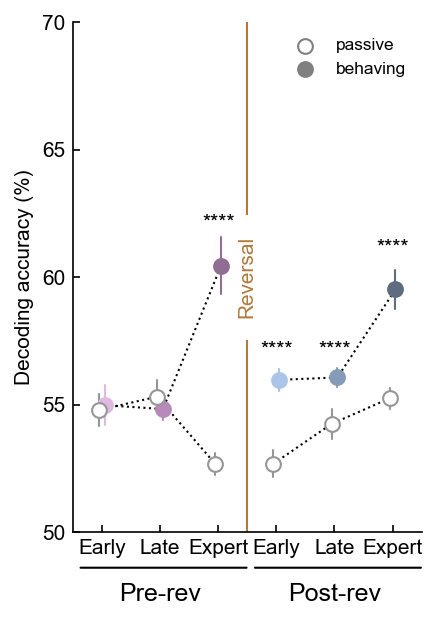

In [53]:
#Firing rate modulation graphs
size=5
numCon = 6

labels = ['Early','Late','Expert','Early','Late','Expert']
offset_distance = 0.05

fig, ax = plt.subplots(figsize=(3,4.5)) #5/3 with height of 4.5

data = [Stim_Dec_preearly,Stim_Dec_prelate,Stim_Dec_preexpert,Stim_Dec_postearly,Stim_Dec_postlate,Stim_Dec_postexpert]
data = [ilep.rmnan(d) for d in data]
#Plot summary
colmaxes = [np.nan]*6
for idx,column in enumerate(data):
    eye_color = PHASE_COLORS[idx]
    border_color=eye_color
    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    colmaxes[idx] = Q3
    
    ax.scatter([idx+offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+offset_distance, idx+offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,2,3)+offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)+offset_distance,medians[3:6],color='k',linestyle=':',lw=1)
    
######################################################################################################################################################
passive_data = [passive_Stim_Dec_preearly,passive_Stim_Dec_prelate,passive_Stim_Dec_preexpert,passive_Stim_Dec_postearly,passive_Stim_Dec_postlate,passive_Stim_Dec_postexpert]
passive_data = [ilep.rmnan(d) for d in passive_data]

#Plot summary
passive_colmaxes = [np.nan]*6
for idx,column in enumerate(passive_data):
    border_color=GOOD_GREY
    eye_color='white'

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    passive_colmaxes[idx] = Q3
    
    ax.scatter([idx-offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
    ax.plot([idx-offset_distance, idx-offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in passive_data]
plt.plot(np.linspace(0,2,3)-offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)-offset_distance,medians[3:6],color='k',linestyle=':',lw=1)


ax.set_ylim([0.5,0.7])
ax.set_yticks([0.5,0.55,0.6,0.65,0.7])
ax.set_yticklabels([50,55,60,65,70])
ax.set_ylabel('Decoding accuracy (%)')

ax.set_xlim(ax.get_xlim())
ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)


# ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=-10,lw=1)
# ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')

ax.scatter([],[],ec='grey',fc='white',s=summary_size,lw=summary_width,zorder=10,marker='o',label='passive')
ax.scatter([],[],ec='grey',fc='grey',s=summary_size,lw=summary_width,zorder=10,marker='o',label='behaving')
lgd = ax.legend(frameon=False)#,loc=(0.6,0.1))




size = 0.025
rev = 2.5
center = np.mean(ax.get_ylim())
ax.text(rev,center,'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center',rotation=90)
ax.plot([rev,rev],[ax.get_ylim()[0],center-size],color=SWITCH_COLOR,lw=1,linestyle='-')
ax.plot([rev,rev],[center+size,ax.get_ylim()[1]],color=SWITCH_COLOR,lw=1,linestyle='-')


    

#statistics
ax.text(2,0.625,str('****'),verticalalignment='top',horizontalalignment='center')
ax.text(3,0.575,str('****'),verticalalignment='top',horizontalalignment='center')
ax.text(4,0.575,str('****'),verticalalignment='top',horizontalalignment='center')
ax.text(5,0.615,str('****'),verticalalignment='top',horizontalalignment='center')
#ax.text(-0.4,9.5,'CR',color=CR_COLOR,horizontalalignment='left',verticalalignment='top')
#ax.text(-0.4,0.5,'NCR',color=NCR_COLOR,horizontalalignment='left',verticalalignment='bottom')
# statsbar(ax,10,[1-offset_distance,1+offset_distance],stemheights=[passive_colmaxes[1] , colmaxes[1]],text='*',lw=0.5)
# statsbar(ax,10,[4-offset_distance,4+offset_distance],stemheights=[passive_colmaxes[4] , colmaxes[4]],text='****',lw=0.5)
# statsbar(ax,10,[5-offset_distance,5+offset_distance],stemheights=[passive_colmaxes[5] , colmaxes[5]],text='****',lw=0.5)


xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.005
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.01, -0.07), xycoords='axes fraction', xytext=(0.51, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.51, -0.07), xycoords='axes fraction', xytext=(1.01, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Mean of Decoding over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,t1,t2), bbox_inches='tight')

# Decoding Perf. Task Encoders

In [14]:
TE_Stim_Dec_preearly = []
TE_Stim_Dec_prelate = []
TE_Stim_Dec_preexpert = []
TE_Stim_Dec_postearly = []
TE_Stim_Dec_postlate = []
TE_Stim_Dec_postexpert = []

passive_TE_Stim_Dec_preearly = []
passive_TE_Stim_Dec_prelate = []
passive_TE_Stim_Dec_preexpert = []
passive_TE_Stim_Dec_postearly = []
passive_TE_Stim_Dec_postlate = []
passive_TE_Stim_Dec_postexpert = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumACSession,EnumACClust))):
    ACsessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        FRmod = ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation
    except Exception as e:
        print(e)
        FRmod = np.nan
    
    stim_acc = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    choice_acc = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    stim_acc_control = getDataPoint(dec_df,session,clust,'stimulus','synthetic_control_weighted_accuracy')
    choice_acc_control = getDataPoint(dec_df,session,clust,'response','synthetic_control_weighted_accuracy')
    
    if stim_acc < task_encoder_threshold_p:
        continue
    
    if getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control') > 0.05:
        stim_acc = np.nan
    if getDataPoint(dec_df,session,clust,'response','pval_synthetic_control') > 0.05:
        choice_acc = np.nan
        
    if EILphases[idx] not in ['pre expert','post expert'] and ACsessionfile.meta.animal in ['DS_15','DS_19']:
        continue

    #1,2,3,4
    if ACsessionfile.meta.day_of_training <= pre_early:
        passive_Stim_Dec_preearly.append(stim_acc)
        passive_Choice_Dec_preearly.append(choice_acc)
        passive_Control_Stim_Dec_preearly.append(stim_acc_control)
        passive_Control_Choice_Dec_preearly.append(choice_acc_control)
        
    #5,6
    if ACsessionfile.meta.day_of_training <= pre_late and ACsessionfile.meta.day_of_training >pre_early:
        passive_Stim_Dec_prelate.append(stim_acc)
        passive_Choice_Dec_prelate.append(choice_acc)
        passive_Control_Stim_Dec_prelate.append(stim_acc_control)
        passive_Control_Choice_Dec_prelate.append(choice_acc_control)
    
    #7,8
    if ACsessionfile.meta.day_of_training <= pre_expert and ACsessionfile.meta.day_of_training >pre_late:
        passive_Stim_Dec_preexpert.append(stim_acc)
        passive_Choice_Dec_preexpert.append(choice_acc)
        passive_Control_Stim_Dec_preexpert.append(stim_acc_control)
        passive_Control_Choice_Dec_preexpert.append(choice_acc_control)
        
    #9,10,11,12
    if ACsessionfile.meta.day_of_training <= post_early and ACsessionfile.meta.day_of_training >pre_expert:
        passive_Stim_Dec_postearly.append(stim_acc)
        passive_Choice_Dec_postearly.append(choice_acc)
        passive_Control_Stim_Dec_postearly.append(stim_acc_control)
        passive_Control_Choice_Dec_postearly.append(choice_acc_control)

    #13,14,15
    if ACsessionfile.meta.day_of_training <= post_late and ACsessionfile.meta.day_of_training >post_early:
        passive_Stim_Dec_postlate.append(stim_acc)
        passive_Choice_Dec_postlate.append(choice_acc)
        passive_Control_Stim_Dec_postlate.append(stim_acc_control)
        passive_Control_Choice_Dec_postlate.append(choice_acc_control)
    
    #16,17,18,19,20,21
    if ACsessionfile.meta.day_of_training >= post_expert:
        passive_Stim_Dec_postexpert.append(stim_acc)
        passive_Choice_Dec_postexpert.append(choice_acc)
        passive_Control_Stim_Dec_postexpert.append(stim_acc_control)
        passive_Control_Choice_Dec_postexpert.append(choice_acc_control)
        
passive_Stim_Dec_preearly = np.array(passive_Stim_Dec_preearly)
passive_Stim_Dec_prelate = np.array(passive_Stim_Dec_prelate)
passive_Stim_Dec_preexpert = np.array(passive_Stim_Dec_preexpert)
passive_Stim_Dec_postearly = np.array(passive_Stim_Dec_postearly)
passive_Stim_Dec_postlate = np.array(passive_Stim_Dec_postlate)
passive_Stim_Dec_postexpert = np.array(passive_Stim_Dec_postexpert)

passive_Choice_Dec_preearly = np.array(passive_Choice_Dec_preearly)
passive_Choice_Dec_prelate = np.array(passive_Choice_Dec_prelate)
passive_Choice_Dec_preexpert = np.array(passive_Choice_Dec_preexpert)
passive_Choice_Dec_postearly = np.array(passive_Choice_Dec_postearly)
passive_Choice_Dec_postlate = np.array(passive_Choice_Dec_postlate)
passive_Choice_Dec_postexpert = np.array(passive_Choice_Dec_postexpert)

passive_Control_Stim_Dec_preearly = np.array(passive_Control_Stim_Dec_preearly)
passive_Control_Stim_Dec_prelate = np.array(passive_Control_Stim_Dec_prelate)
passive_Control_Stim_Dec_preexpert = np.array(passive_Control_Stim_Dec_preexpert)
passive_Control_Stim_Dec_postearly = np.array(passive_Control_Stim_Dec_postearly)
passive_Control_Stim_Dec_postlate = np.array(passive_Control_Stim_Dec_postlate)
passive_Control_Stim_Dec_postexpert = np.array(passive_Control_Stim_Dec_postexpert)

passive_Control_Choice_Dec_preearly = np.array(passive_Control_Choice_Dec_preearly)
passive_Control_Choice_Dec_prelate = np.array(passive_Control_Choice_Dec_prelate)
passive_Control_Choice_Dec_preexpert = np.array(passive_Control_Choice_Dec_preexpert)
passive_Control_Choice_Dec_postearly = np.array(passive_Control_Choice_Dec_postearly)
passive_Control_Choice_Dec_postlate = np.array(passive_Control_Choice_Dec_postlate)
passive_Control_Choice_Dec_postexpert = np.array(passive_Control_Choice_Dec_postexpert)

1442it [00:16, 84.96it/s] 
